# TABULAR PLAYGROUND SERIES JUL 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:
FOLDER_PATH = 'tps-jul-2021'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

In [3]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, TRAIN_FILE), 
                       parse_dates=['date_time'], index_col='date_time')
test_df = pd.read_csv(os.path.join(FOLDER_PATH, TEST_FILE), 
                     parse_dates=['date_time'], index_col='date_time')

In [4]:
train_df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,,,,,,,,,
2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


## ONLINE NOTEBOOK

How to Detect White Noise and Random Walks in TS  
https://www.kaggle.com/code/bextuychiev/how-to-detect-white-noise-and-random-walks-in-ts

### 1. Brief Notes on Autocorrelation

In [5]:
deg_C = train_df['deg_C'].to_frame('temperature')
deg_C.head()

,temperature
date_time,
2010-03-10 18:00:00,13.1
2010-03-10 19:00:00,13.2
2010-03-10 20:00:00,12.6
2010-03-10 21:00:00,11.0
2010-03-10 22:00:00,11.9


In [6]:
deg_C['lag_1'] = deg_C['temperature'].shift(periods=1)
deg_C['lag_2'] = deg_C['temperature'].shift(periods=2)
deg_C['lag_3'] = deg_C['temperature'].shift(periods=3)

deg_C.head()

,temperature,lag_1,lag_2,lag_3
date_time,,,,
2010-03-10 18:00:00,13.1,NaN,NaN,NaN
2010-03-10 19:00:00,13.2,13.1,NaN,NaN
2010-03-10 20:00:00,12.6,13.2,13.1,NaN
2010-03-10 21:00:00,11.0,12.6,13.2,13.1
2010-03-10 22:00:00,11.9,11.0,12.6,13.2


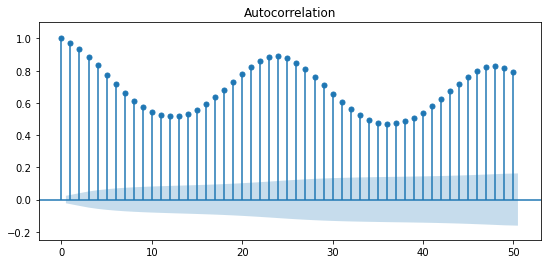

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 4

fig = plot_acf(deg_C['temperature'], lags=50)
plt.ylim([-0.25, 1.1])

plt.show()

### 2. What is White Noise?

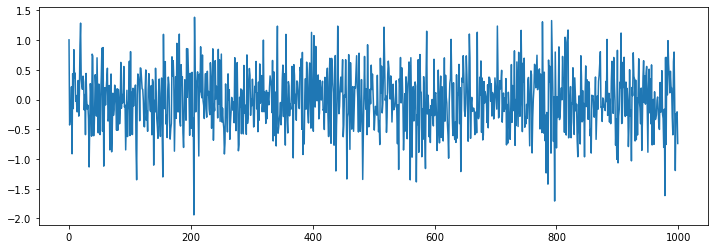

In [8]:
noise = np.random.normal(loc=0, scale=0.5, size=1000)

plt.figure(figsize=(12, 4))
plt.plot(noise)

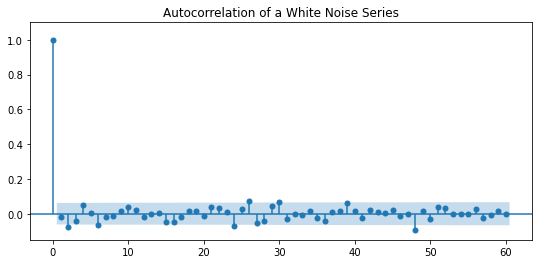

In [9]:
fig = plot_acf(noise, lags=60)

plt.title('Autocorrelation of a White Noise Series')
plt.ylim([-0.15, 1.1])
plt.show()

### 3. Importance of White Noise in Forecasting

CPU times: total: 2.91 s
Wall time: 3.56 s


Text(0.5, 1.0, 'Plot of the Error Residuals of Carbon Monoxide')

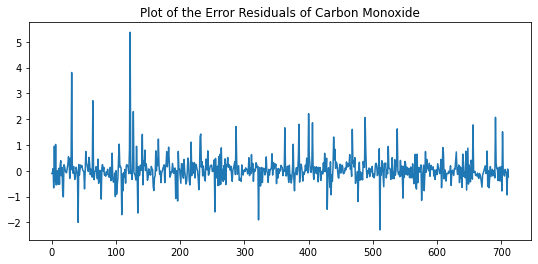

In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1)
y = train_df['target_carbon_monoxide']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42, test_size=0.1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_val_preds = rfr.predict(X_val)
y_resid = y_val.values - y_val_preds

plt.plot(y_resid)
plt.title('Plot of the Error Residuals of Carbon Monoxide')

CPU times: total: 2.44 s
Wall time: 2.44 s


Text(0.5, 1.0, 'Plot of the Error Residuals of Benzene')

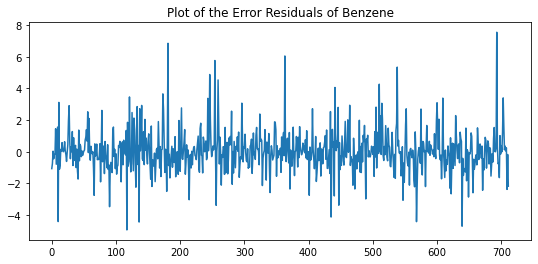

In [11]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1).values
y = train_df['target_benzene'].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42, test_size=0.1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_val_preds = rfr.predict(X_val)
y_resid = y_val - y_val_preds

plt.plot(y_resid)
plt.title('Plot of the Error Residuals of Benzene')

CPU times: total: 2.94 s
Wall time: 2.92 s


Text(0.5, 1.0, 'Plot of the Error Residuals of Nitrogen Oxides')

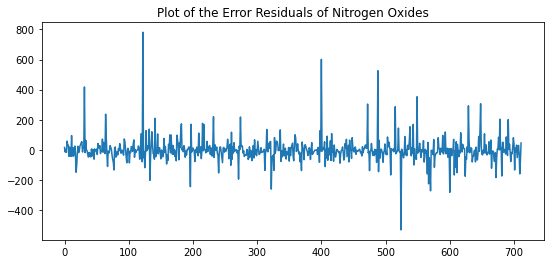

In [12]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1).values
y = train_df['target_nitrogen_oxides'].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=42, test_size=0.1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_val_preds = rfr.predict(X_val)
y_resid = y_val - y_val_preds

plt.plot(y_resid)
plt.title('Plot of the Error Residuals of Nitrogen Oxides')

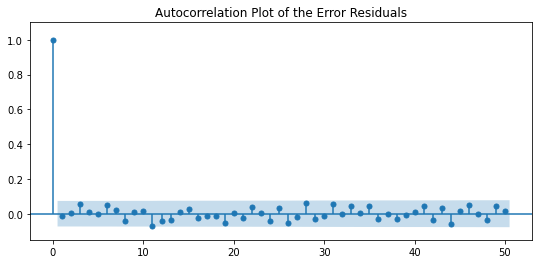

In [13]:
fig = plot_acf(y_val_preds, lags=50)

plt.title('Autocorrelation Plot of the Error Residuals')
plt.ylim([-0.15, 1.1])
plt.show()

### 4. Random Walk

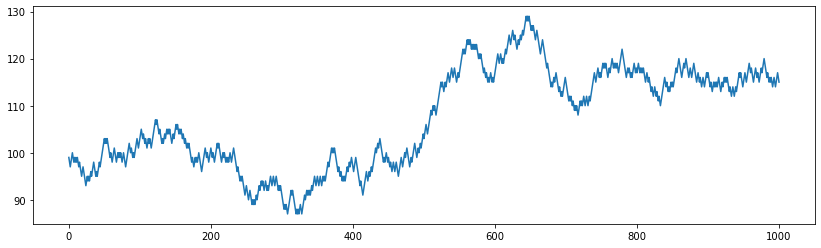

In [14]:
walk = [99]

for i in range(1000):
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)

rcParams['figure.figsize'] = 14, 4
plt.plot(walk)

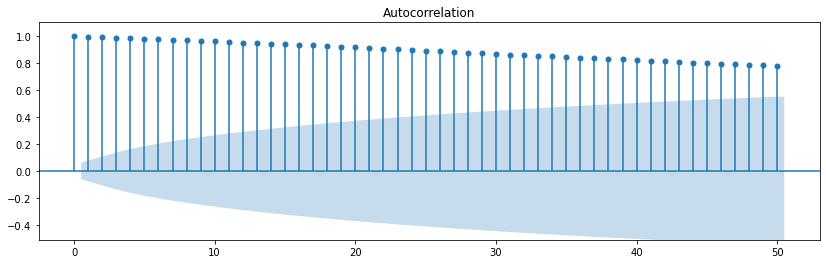

In [15]:
fig = plot_acf(walk, lags=50)

plt.ylim([-0.51, 1.1])
plt.show()

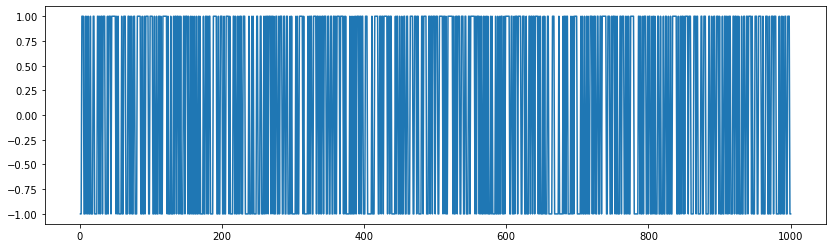

In [16]:
walk_diff = pd.Series(walk).diff()

plt.plot(walk_diff);

### 5. Random Walks with Drift

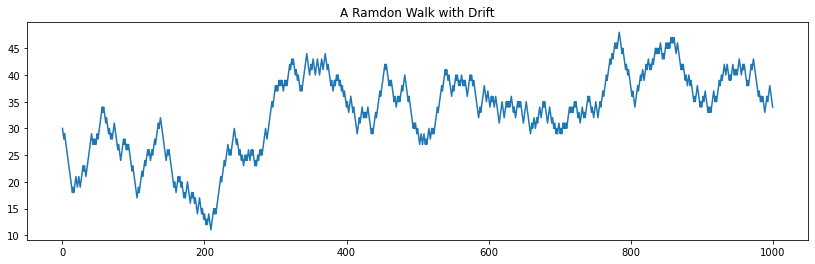

In [17]:
walk = [25]

for i in range(1000):
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
DRIFT = 5
drifty_walk = pd.Series(walk) + 5

drifty_walk.plot(title='A Ramdon Walk with Drift');

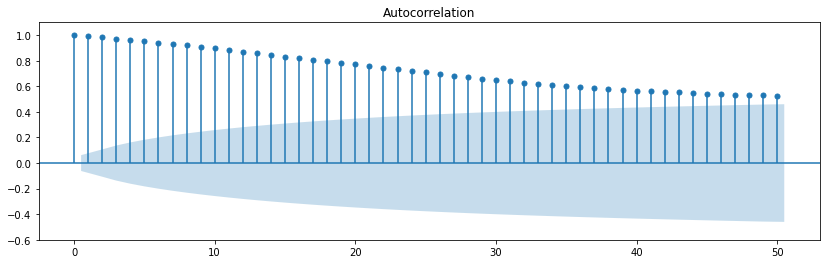

In [18]:
fig = plot_acf(drifty_walk, lags=50)
plt.ylim([-0.6, 1.1])
plt.show()

<AxesSubplot:>

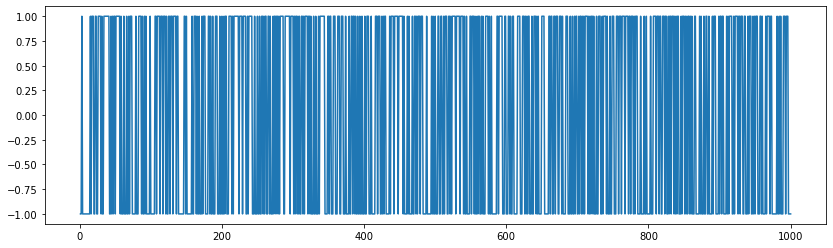

In [19]:
drifty_walk.diff().plot()

### 6. Detecting Random Walks Statistically

In [20]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(drifty_walk)
print(f'ADF Statistics: {results[0]}')
print(f'p-value: {results[1]}')
print('Critical Values:')
for key, value in results[4].items():
    print(f'{key}: {value:.3f}')

ADF Statistics: -2.0831139162263623
p-value: 0.2513585642785102
Critical Values:
1%: -3.437
5%: -2.864
10%: -2.568


In [21]:
results = adfuller(train_df['target_carbon_monoxide'])
print(f'ADF Statistics: {results[0]}')
print(f'p-value: {results[1]}')
print('Critical Values:')
for key, value in results[4].items():
    print(f'{key}: {value:.3f}')

ADF Statistics: -8.982102584772042
p-value: 7.263413572494717e-15
Critical Values:
1%: -3.431
5%: -2.862
10%: -2.567


## ONLINE NOTEBOOK2

How to Remove Non-Stationarity in Time Series Forecasting  
https://www.kaggle.com/code/bextuychiev/how-to-remove-non-stationarity-from-time-series

A static relationship requires inputs and outputs with constant parameters such as mean, median, and variance. In other words, algorithms perform best when the inputs and outputs are stationary.

This is not the case in time series forecasting. Distributions that change over time can have unique properties such as seasonality and trend. These, in turn, cause the mean and variance of the series to fluctuate, making it hard to model their behavior.

### 1. Why is Stationary Important?

When these parameters are all time-dependent, algorithms will face different values at each point in time. And if the time series is granular enough (such as minutes or seconds frequencies), models may even end up with more parameters than actual data.

This type of variable relationship between inputs and outputs will seriously compromise the decision function of any model. If the relationship keeps changing through time, models end up using an outdated relationship or one that does not contribute to its predictive power.

### 2. Detecting Non-Stationarity Statistically

The augmented Dickey-Fuller test has the null and alternative hypotheses as:

* The null hypothesis: the distribution is non-stationary, time-dependent (it has a unit root)
* The alternative hypothesis: the distribution is stationary, not time-dependent (can't be represented by a unit root)

In [22]:
test_results = adfuller(train_df['target_nitrogen_oxides'])

print(f'ADF test statistics: {test_results[0]}')
print(f'p-value: {test_results[1]}')
print('Critical thresholds: ')
for key, value in test_results[4].items():
    print(f'{key}: {value:.3f}')

ADF test statistics: -5.690148089661308
p-value: 8.106358998505334e-07
Critical thresholds: 
1%: -3.431
5%: -2.862
10%: -2.567


### 3. Transforming Non-Stationary Series to Make it Stationary

1. One method for transforming the simplest non-stationary data is differencing. For simple distributions, taking the first-order difference is enough to make it stationary. 
2. Before taking the difference, we have to account for that obvious non-linear trend. Otherwise, the series will still be non-stationary. To remove non-linearity, we will use the logarithmic function `np.log` and then, take the first-order difference.

## ONLINE NOTEBOOK3

TPS July 2021 | EPIC EDA | XGB vs LGBM vs CB  
https://www.kaggle.com/code/dmitryuarov/tps-july-2021-epic-eda-xgb-vs-lgbm-vs-cb

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, TRAIN_FILE), 
                       parse_dates=['date_time'], index_col='date_time')
test_df = pd.read_csv(os.path.join(FOLDER_PATH, TEST_FILE), 
                     parse_dates=['date_time'], index_col='date_time')

for df in [train_df, test_df]:
    df['day_of_week'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['is_peak_hours'] = df['hour'].isin([8, 9, 17, 18, 19, 20]).astype('int')
    df['is_work_hours'] = df['hour'].isin(np.arange(8, 19, 1)).astype('int')
    df['is_weekend'] = (df.index.dayofweek >= 5).astype('int')
    df['rel_hum_lag_12'] = df['relative_humidity'] - df[
        'relative_humidity'].shift(periods=12, fill_value=0)
    df['deg_lag_12'] = df['deg_C'] - df['deg_C'].shift(periods=12, fill_value=0)
    for k in [1, 3, 6, 8, 12, 24]:
        df[f's1-{k}'] = df['sensor_1'] - df['sensor_1'].shift(periods=k, fill_value=0)
        df[f's1+{k}'] = df['sensor_1'] - df['sensor_1'].shift(periods=-k, fill_value=0)
        df[f's2-{k}'] = df['sensor_2'] - df['sensor_2'].shift(periods=k, fill_value=0)
        df[f's2+{k}'] = df['sensor_2'] - df['sensor_2'].shift(periods=-k, fill_value=0)
        df[f's3-{k}'] = df['sensor_3'] - df['sensor_3'].shift(periods=k, fill_value=0)
        df[f's3+{k}'] = df['sensor_3'] - df['sensor_3'].shift(periods=-k, fill_value=0)
        df[f's4-{k}'] = df['sensor_4'] - df['sensor_4'].shift(periods=k, fill_value=0)
        df[f's4+{k}'] = df['sensor_4'] - df['sensor_4'].shift(periods=-k, fill_value=0)
        df[f's5-{k}'] = df['sensor_5'] - df['sensor_5'].shift(periods=k, fill_value=0)
        df[f's5+{k}'] = df['sensor_5'] - df['sensor_5'].shift(periods=-k, fill_value=0)

### EDA
#### Target Values

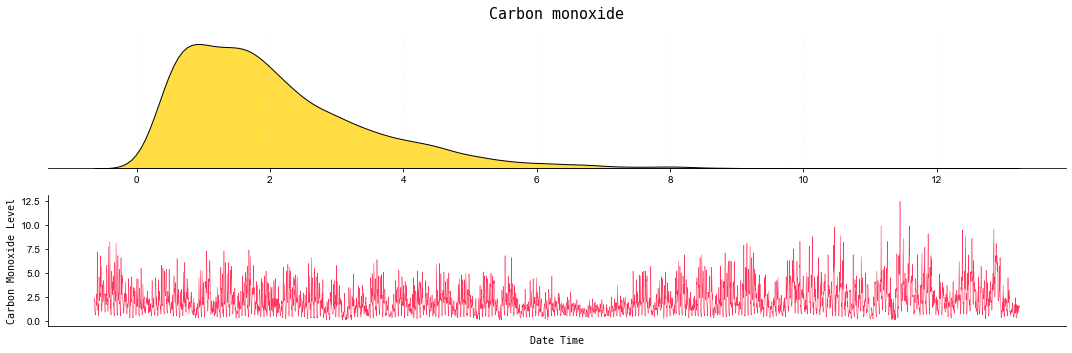

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))

sns.set_style('white')

sns.kdeplot(train_df['target_carbon_monoxide'], color='#ffd514', fill=True, 
            label='Carbon Monoxide', alpha=0.8, linewidth=1, edgecolor='black', ax=axes[0])
axes[0].set_title('Carbon monoxide', size=15, y=1.1, fontname='monospace', color='black')
axes[0].grid(color='lightgray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7))
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_yticks([])
for s in ['right', 'top', 'left']:
    axes[0].spines[s].set_visible(False)
    
sns.lineplot(data=train_df, x=train_df.index, y='target_carbon_monoxide', color='#ff355d', 
             linewidth=0.5)
axes[1].set_ylabel('Carbon Monoxide Level', size=10, fontname='monospace')
axes[1].set_xlabel('Date Time', size=10, fontname='monospace', labelpad=10)
axes[1].set_xticks([])
axes[1].tick_params(axis='y', labelsize=10)
for s in ['right', 'top']:
    axes[1].spines[s].set_visible(False)

plt.tight_layout()
plt.show()

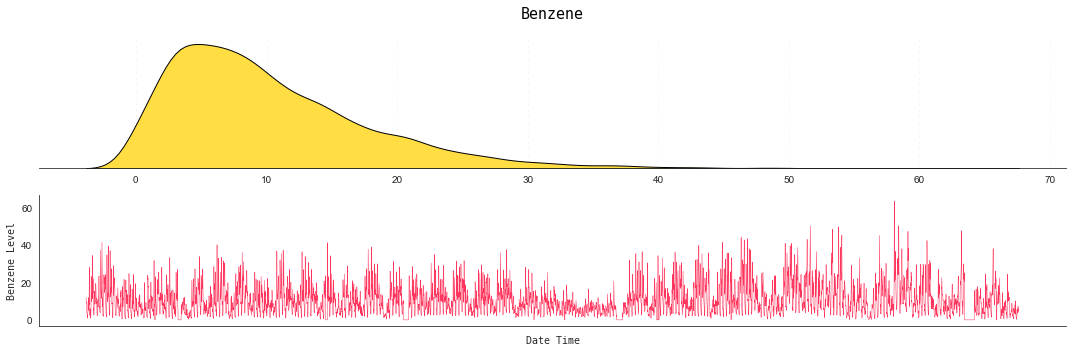

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))

sns.set_style('white')

sns.kdeplot(train_df['target_benzene'], color='#ffd514', fill=True, 
            label='Benzene', alpha=0.8, linewidth=1, edgecolor='black', ax=axes[0])
axes[0].set_title('Benzene', size=15, y=1.1, fontname='monospace', color='black')
axes[0].grid(color='lightgray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7))
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_yticks([])
for s in ['right', 'top', 'left']:
    axes[0].spines[s].set_visible(False)
    
sns.lineplot(data=train_df, x=train_df.index, y='target_benzene', color='#ff355d', 
             linewidth=0.5)
axes[1].set_ylabel('Benzene Level', size=10, fontname='monospace')
axes[1].set_xlabel('Date Time', size=10, fontname='monospace', labelpad=10)
axes[1].set_xticks([])
axes[1].tick_params(axis='y', labelsize=10)
for s in ['right', 'top']:
    axes[1].spines[s].set_visible(False)

plt.tight_layout()
plt.show()

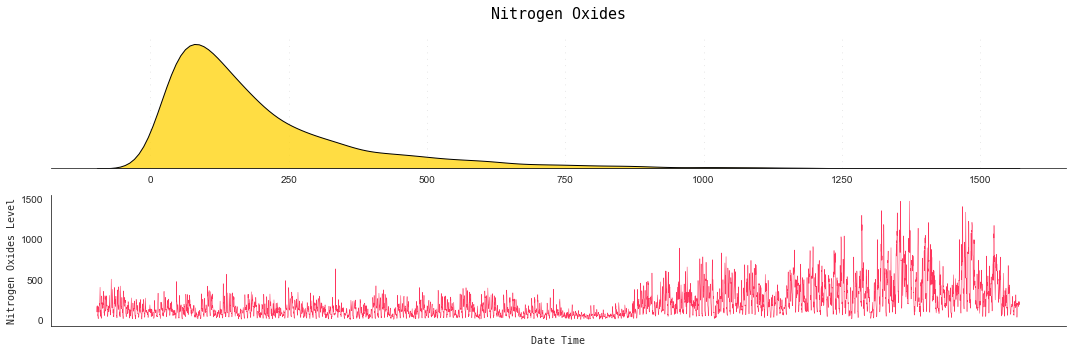

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))

sns.set_style('white')

sns.kdeplot(train_df['target_nitrogen_oxides'], color='#ffd514', fill=True, 
            label='Nitrogen Oxides', alpha=0.8, linewidth=1, edgecolor='black', ax=axes[0])
axes[0].set_title('Nitrogen Oxides', size=15, y=1.1, fontname='monospace', color='black')
axes[0].grid(color='lightgray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7))
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_yticks([])
for s in ['right', 'top', 'left']:
    axes[0].spines[s].set_visible(False)
    
sns.lineplot(data=train_df, x=train_df.index, y='target_nitrogen_oxides', color='#ff355d', 
             linewidth=0.5)
axes[1].set_ylabel('Nitrogen Oxides Level', size=10, fontname='monospace')
axes[1].set_xlabel('Date Time', size=10, fontname='monospace', labelpad=10)
axes[1].set_xticks([])
axes[1].tick_params(axis='y', labelsize=10)
for s in ['right', 'top']:
    axes[1].spines[s].set_visible(False)

plt.tight_layout()
plt.show()

#### Feature Distributions

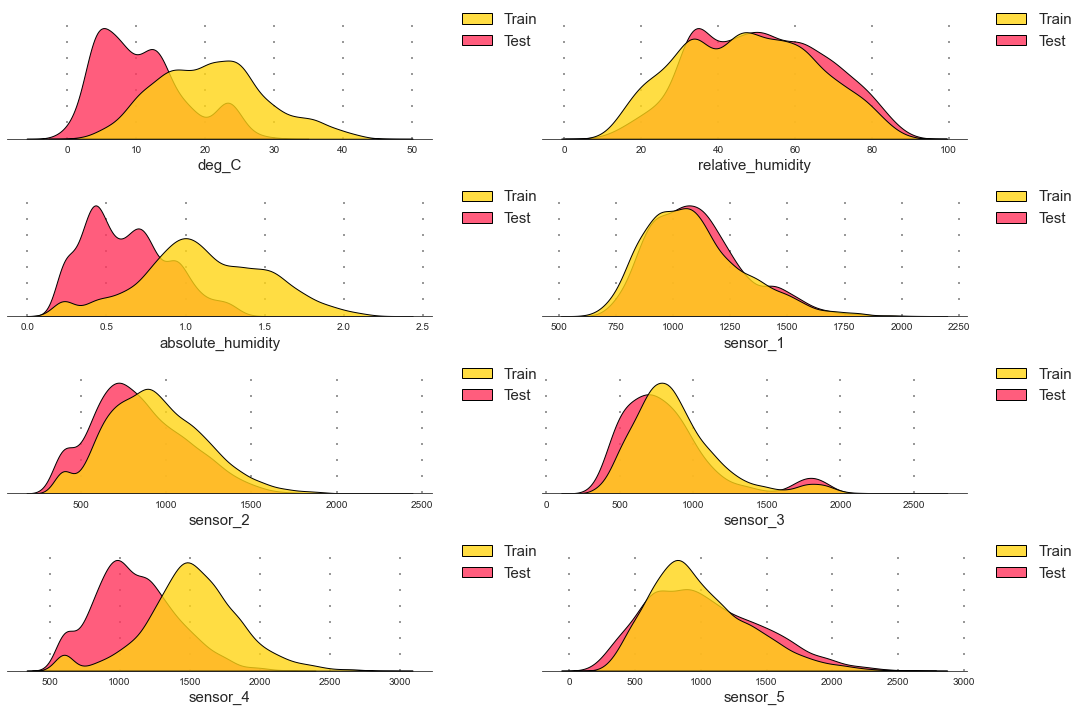

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

axes = axes.flatten()

sns.set_style('white')

features = ['deg_C', 'relative_humidity', 'absolute_humidity', 
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

for i, feature in enumerate(features):
    sns.kdeplot(train_df[feature], color='#ffd514', fill=True, zorder=2, 
                label=feature, alpha=0.8, linewidth=1, edgecolor='black', ax=axes[i])
    sns.kdeplot(test_df[feature], color='#ff355d', fill=True, zorder=1, 
                label=feature, alpha=0.8, linewidth=1, edgecolor='black', ax=axes[i])
    #axes[i].set_title(feature, size=15, y=1.1, fontname='monospace', color='black')
    axes[i].grid(color='gray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7), 
                linewidth=2)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(feature, fontsize=15)
    axes[i].set_yticks([])
    for s in ['right', 'top', 'left']:
        axes[i].spines[s].set_visible(False)
    axes[i].legend(['Train', 'Test'], bbox_to_anchor=(1.28, 1.2), ncol=1, 
                  edgecolor='white', facecolor='white', fontsize=15)

plt.tight_layout()

#### Dynamics of Feature Changes

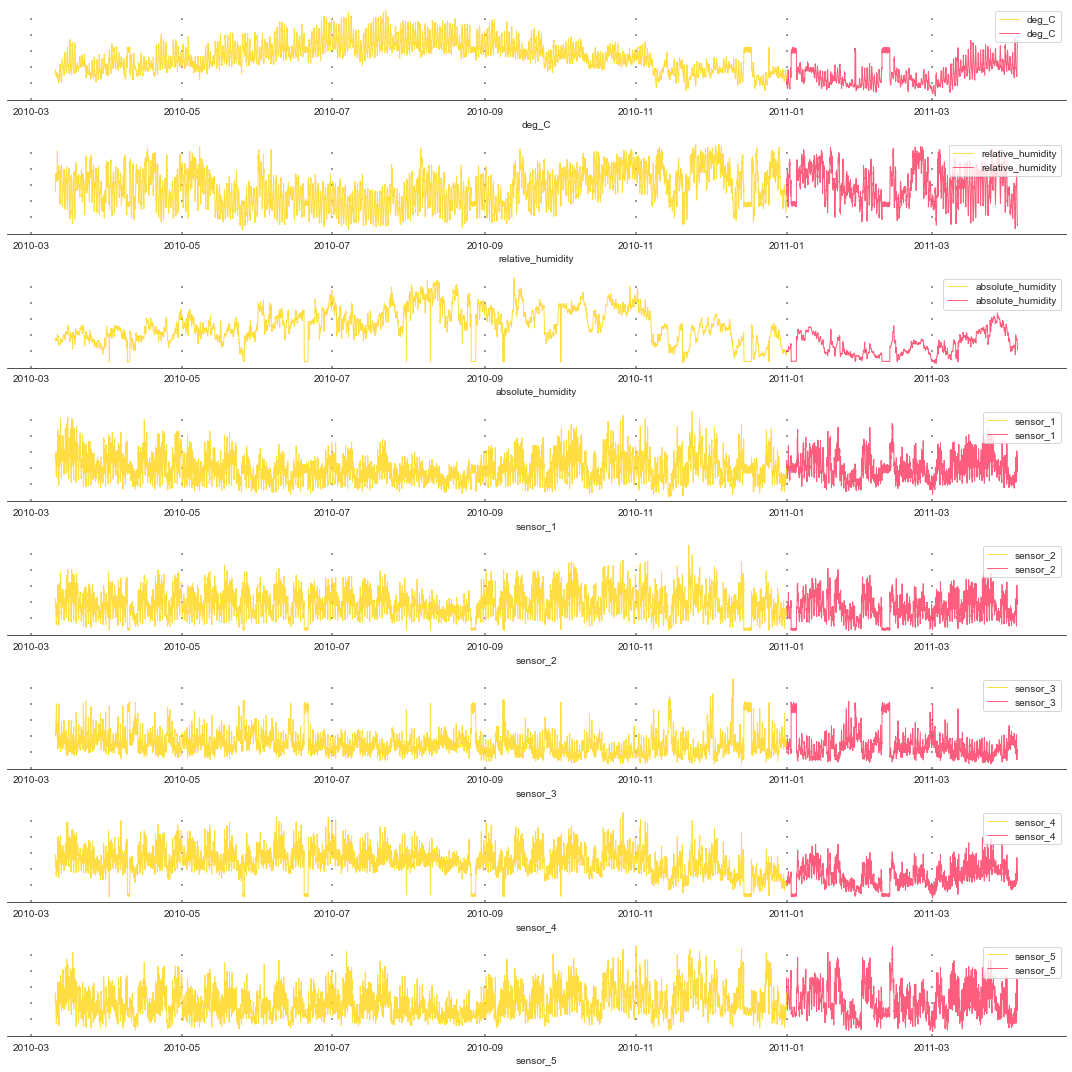

In [29]:
fig, axes = plt.subplots(8, 1, figsize=(15, 15))

axes = axes.flatten()
sns.set_style('white')

features = ['deg_C', 'relative_humidity', 'absolute_humidity', 
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

for i, feature in enumerate(features):
    sns.lineplot(data=train_df[feature], color='#ffd514', zorder=2, 
                label=feature, alpha=0.8, linewidth=1, ax=axes[i])
    sns.lineplot(data=test_df[feature], color='#ff355d', zorder=1, 
                label=feature, alpha=0.8, linewidth=1, ax=axes[i])
    #axes[i].set_title(feature, size=15, y=1.1, fontname='monospace', color='black')
    axes[i].grid(color='gray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7), 
                linewidth=2)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_yticks([])
    for s in ['right', 'top', 'left']:
        axes[i].spines[s].set_visible(False)
    axes[i].legend(loc='upper right')

plt.tight_layout()

#### Changes of Target Values Mean by Month/Day/Hour

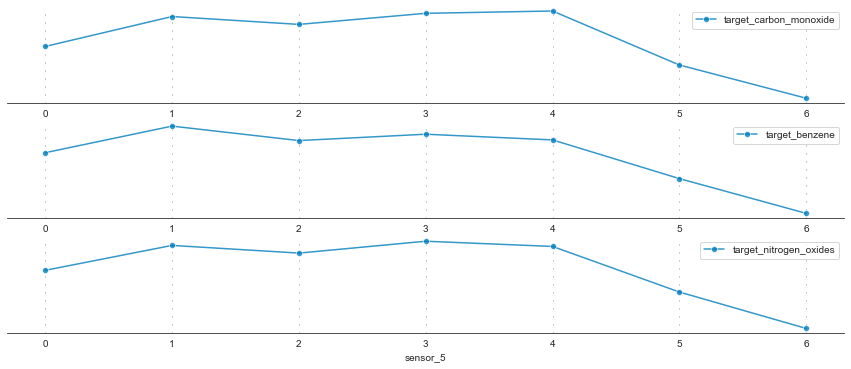

In [30]:
m_carbon = train_df.groupby('day_of_week').agg({'target_carbon_monoxide': 'mean'}).reset_index()
m_benzene = train_df.groupby('day_of_week').agg({'target_benzene': 'mean'}).reset_index()
m_nitrogen = train_df.groupby('day_of_week').agg({'target_nitrogen_oxides': 'mean'}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(15, 6))
axes = axes.flatten()
sns.set_style('white')

dfs = [m_carbon, m_benzene, m_nitrogen]

for i, df in enumerate(dfs):
    sns.lineplot(data=df, x=df.columns[0], y=df.columns[1], color='#007dbc', zorder=2, 
                label=df.columns[1], alpha=0.8, marker='o', markersize=6, ax=axes[i])
    #axes[i].set_title(feature, size=15, y=1.1, fontname='monospace', color='black')
    axes[i].grid(color='gray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7), 
                linewidth=1)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_yticks([])
    for s in ['right', 'top', 'left']:
        axes[i].spines[s].set_visible(False)
    axes[i].legend()

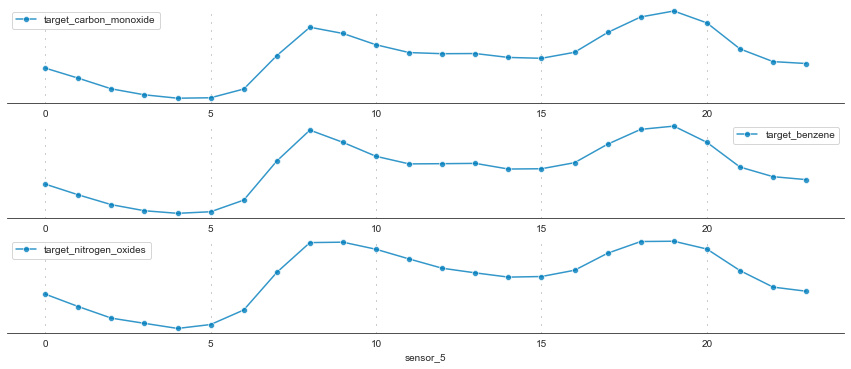

In [31]:
h_carbon = train_df.groupby('hour').agg({'target_carbon_monoxide': 'mean'}).reset_index()
h_benzene = train_df.groupby('hour').agg({'target_benzene': 'mean'}).reset_index()
h_nitrogen = train_df.groupby('hour').agg({'target_nitrogen_oxides': 'mean'}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(15, 6))
axes = axes.flatten()
sns.set_style('white')

dfs = [h_carbon, h_benzene, h_nitrogen]

for i, df in enumerate(dfs):
    sns.lineplot(data=df, x=df.columns[0], y=df.columns[1], color='#007dbc', zorder=2, 
                label=df.columns[1], alpha=0.8, marker='o', markersize=6, ax=axes[i])
    #axes[i].set_title(feature, size=15, y=1.1, fontname='monospace', color='black')
    axes[i].grid(color='gray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7), 
                linewidth=1)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_yticks([])
    for s in ['right', 'top', 'left']:
        axes[i].spines[s].set_visible(False)
    axes[i].legend()

### Preprocessing for Modeling

In [32]:
for i in ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']:
    train_df[i] = np.log1p(train_df[i])
    
y1 = train_df[['target_carbon_monoxide']]
y2 = train_df[['target_benzene']]
y3 = train_df[['target_nitrogen_oxides']]

X = train_df.drop(['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'], axis=1)

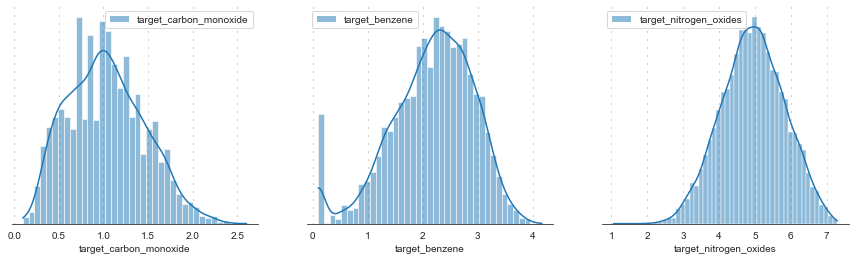

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
sns.set_style('white')

dfs = [y1, y2, y3]

for i, df in enumerate(dfs):
    sns.histplot(df, color='#ff514d', kde=True, ax=axes[i])
    #axes[i].set_title(feature, size=15, y=1.1, fontname='monospace', color='black')
    axes[i].grid(color='gray', linestyle=':', axis='x', alpha=0.8, zorder=0, dashes=(1, 7), 
                linewidth=1)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(df.columns[0], fontsize=10)
    axes[i].set_yticks([])
    for s in ['right', 'top', 'left']:
        axes[i].spines[s].set_visible(False)

### Modeling

In [34]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error
import optuna
from optuna import trial

#### XGBoost

In [35]:
def objective(trial, adta=X, y=y3):
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 5000, 30000), 
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 200), 
        'gamma': trial.suggest_float('gamma', 0.0001, 1.0, log=True), 
        'alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True), 
        'lambda': trial.suggest_float('lambda', 0.0001, 10.0, log=True), 
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8), 
        'subsample': trial.suggest_float('subsample', 0.1, 0.8), 
        'booster': 'gbtree', 
        'random_state': 42, 
        'use_label_encoder': False,
        'eval_metric': 'rmsle', 
        'early_stopping_rounds': 200
    }
    
    model = XGBRegressor(**params)
    scores = []
    ts = TimeSeriesSplit(n_splits=5)
    for i, (train_idx, val_idx) in enumerate(ts.split(X, y3)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y3.iloc[train_idx], y3.iloc[val_idx]
        
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        
        tr_preds = np.expm1(model.predict(X_train))
        tr_preds = np.clip(tr_preds, 0, np.inf)       
        train_score = np.sqrt(mean_squared_log_error(np.expm1(y_train), tr_preds))
        
        val_preds = np.expm1(model.predict(X_val))
        val_preds = np.clip(val_preds, 0, np.inf)
        val_score = np.sqrt(mean_squared_log_error(np.expm1(y_val), val_preds))
        
        scores.append((train_score, val_score))
        print(f'Fold {i+1} | RMSLE: {val_score}')
        
    scores = pd.DataFrame(scores, columns=['train_scores', 'val_scores'])
    
    return scores['val_scores'].mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Number of completed trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

[I 2023-01-05 17:03:49,432] A new study created in memory with name: no-name-07dffd8d-9f29-45c9-8a50-058c94541d5b


Fold 1 | RMSLE: 0.2645298173881999
Fold 2 | RMSLE: 0.28266006864594206
Fold 3 | RMSLE: 0.5500323260187602
Fold 4 | RMSLE: 0.40859965436276136


[I 2023-01-05 17:03:59,920] Trial 0 finished with value: 0.42180593275737976 and parameters: {'max_depth': 5, 'learning_rate': 0.13797763114831565, 'n_estimators': 8617, 'min_child_weight': 130, 'gamma': 0.008702065985547836, 'alpha': 0.3707724175903338, 'lambda': 0.02128397209990372, 'colsample_bytree': 0.5461465180809479, 'subsample': 0.7190390180746296}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6032077973712353
Fold 1 | RMSLE: 0.2510464221924856
Fold 2 | RMSLE: 0.29073605187351603
Fold 3 | RMSLE: 0.551925931651098
Fold 4 | RMSLE: 0.42905181305082246


[I 2023-01-05 17:04:06,915] Trial 1 finished with value: 0.4289867169936266 and parameters: {'max_depth': 6, 'learning_rate': 0.11910733475390657, 'n_estimators': 25286, 'min_child_weight': 37, 'gamma': 0.019986621447665363, 'alpha': 1.0840605240501198, 'lambda': 7.348293349061439, 'colsample_bytree': 0.43538055154022426, 'subsample': 0.2993841406770369}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6221733662002108
Fold 1 | RMSLE: 0.25169181010232056
Fold 2 | RMSLE: 0.2866040029912353
Fold 3 | RMSLE: 0.5463301435420412
Fold 4 | RMSLE: 0.4141301308870058


[I 2023-01-05 17:04:22,511] Trial 2 finished with value: 0.4229113720248665 and parameters: {'max_depth': 4, 'learning_rate': 0.09043236027788139, 'n_estimators': 12004, 'min_child_weight': 80, 'gamma': 0.0023643685774373383, 'alpha': 0.006715583521417057, 'lambda': 0.17480861224817368, 'colsample_bytree': 0.1579132446178428, 'subsample': 0.7596099025869217}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6158007726017297
Fold 1 | RMSLE: 0.2779449092236219
Fold 2 | RMSLE: 0.294210068501407
Fold 3 | RMSLE: 0.5554312581093979
Fold 4 | RMSLE: 0.4137409670206776


[I 2023-01-05 17:04:33,972] Trial 3 finished with value: 0.42746702384932256 and parameters: {'max_depth': 2, 'learning_rate': 0.17520727419745086, 'n_estimators': 19939, 'min_child_weight': 119, 'gamma': 0.0002152739331330519, 'alpha': 6.956111987541762, 'lambda': 0.014551204908712652, 'colsample_bytree': 0.6260957259877473, 'subsample': 0.4180309770462617}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.5960079163915083
Fold 1 | RMSLE: 0.34391008918636384
Fold 2 | RMSLE: 0.3248282095790382
Fold 3 | RMSLE: 0.5689850392349745
Fold 4 | RMSLE: 0.48923953453582875


[I 2023-01-05 17:04:40,291] Trial 4 finished with value: 0.48061468698782156 and parameters: {'max_depth': 5, 'learning_rate': 0.13951626139877374, 'n_estimators': 18134, 'min_child_weight': 76, 'gamma': 0.08605690156732039, 'alpha': 0.0024596481549457932, 'lambda': 0.0010080647880375095, 'colsample_bytree': 0.22635679492223842, 'subsample': 0.11292201445396582}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6761105624029027
Fold 1 | RMSLE: 0.2509475729240725
Fold 2 | RMSLE: 0.284559455639706
Fold 3 | RMSLE: 0.5394836379021266
Fold 4 | RMSLE: 0.44076684843998415


[I 2023-01-05 17:04:56,654] Trial 5 finished with value: 0.4265815529421674 and parameters: {'max_depth': 6, 'learning_rate': 0.11919256096834484, 'n_estimators': 14067, 'min_child_weight': 76, 'gamma': 0.8481574141696426, 'alpha': 0.009480562061133065, 'lambda': 0.09517624580279793, 'colsample_bytree': 0.4717622112749509, 'subsample': 0.7522068338970802}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6171502498049476
Fold 1 | RMSLE: 0.32663013726299406
Fold 2 | RMSLE: 0.30569344673853827
Fold 3 | RMSLE: 0.5559171064512635
Fold 4 | RMSLE: 0.46693765207610877


[I 2023-01-05 17:05:01,226] Trial 6 finished with value: 0.4545923908769893 and parameters: {'max_depth': 7, 'learning_rate': 0.1665558138302039, 'n_estimators': 20916, 'min_child_weight': 84, 'gamma': 0.309586752297645, 'alpha': 0.2257999570638748, 'lambda': 0.006231857383296806, 'colsample_bytree': 0.47907525161131126, 'subsample': 0.16946503849961106}. Best is trial 0 with value: 0.42180593275737976.


Fold 5 | RMSLE: 0.6177836118560418
Fold 1 | RMSLE: 0.2509293315444275
Fold 2 | RMSLE: 0.2860154951346331
Fold 3 | RMSLE: 0.5397234461010303
Fold 4 | RMSLE: 0.3593011374228524


[I 2023-01-05 17:05:13,603] Trial 7 finished with value: 0.4045346631419532 and parameters: {'max_depth': 3, 'learning_rate': 0.05863260291109179, 'n_estimators': 6423, 'min_child_weight': 41, 'gamma': 0.0037536226721916013, 'alpha': 0.020156560860561536, 'lambda': 0.0001038101679227635, 'colsample_bytree': 0.4483280789482973, 'subsample': 0.3697118620769112}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5867039055068227
Fold 1 | RMSLE: 0.2646139847621957
Fold 2 | RMSLE: 0.28703884887468595
Fold 3 | RMSLE: 0.548313055436921
Fold 4 | RMSLE: 0.4023781008684534


[I 2023-01-05 17:05:23,313] Trial 8 finished with value: 0.42330239193456026 and parameters: {'max_depth': 5, 'learning_rate': 0.0506402782017729, 'n_estimators': 26735, 'min_child_weight': 64, 'gamma': 0.000224276701375229, 'alpha': 0.004392865605156781, 'lambda': 0.046661883242734466, 'colsample_bytree': 0.6441571466396582, 'subsample': 0.24386835461925013}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6141679697305454
Fold 1 | RMSLE: 0.25760545426807274
Fold 2 | RMSLE: 0.2959058490739814
Fold 3 | RMSLE: 0.5531475268885826
Fold 4 | RMSLE: 0.42716594683114745


[I 2023-01-05 17:05:28,011] Trial 9 finished with value: 0.4346688043434167 and parameters: {'max_depth': 6, 'learning_rate': 0.1656518932766606, 'n_estimators': 25331, 'min_child_weight': 24, 'gamma': 0.001684674817085965, 'alpha': 1.413231818745006, 'lambda': 0.00046251161874867727, 'colsample_bytree': 0.39900857143039004, 'subsample': 0.2033706349415476}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6395192446552994
Fold 1 | RMSLE: 0.275534957734178
Fold 2 | RMSLE: 0.29137130183081283
Fold 3 | RMSLE: 0.5554183790690534
Fold 4 | RMSLE: 0.4150713240745058


[I 2023-01-05 17:05:50,114] Trial 10 finished with value: 0.4298892193075557 and parameters: {'max_depth': 2, 'learning_rate': 0.0297080111552719, 'n_estimators': 5517, 'min_child_weight': 188, 'gamma': 0.00271025204150566, 'alpha': 0.00010448260455502893, 'lambda': 0.00013823570039945133, 'colsample_bytree': 0.3193611268747425, 'subsample': 0.5804250082187324}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6120501338292283
Fold 1 | RMSLE: 0.2682112426901761
Fold 2 | RMSLE: 0.2866371187833298
Fold 3 | RMSLE: 0.5478947547752445
Fold 4 | RMSLE: 0.38294015926371905


[I 2023-01-05 17:06:04,623] Trial 11 finished with value: 0.41742980664747187 and parameters: {'max_depth': 3, 'learning_rate': 0.07202418686653281, 'n_estimators': 5016, 'min_child_weight': 136, 'gamma': 0.015422562136633611, 'alpha': 0.07628230471661554, 'lambda': 2.157507090557584, 'colsample_bytree': 0.7690598555236685, 'subsample': 0.5462528110441625}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6014657577248896
Fold 1 | RMSLE: 0.274709883795633
Fold 2 | RMSLE: 0.2876827522217346
Fold 3 | RMSLE: 0.550928062541504
Fold 4 | RMSLE: 0.3945403380759611


[I 2023-01-05 17:06:17,986] Trial 12 finished with value: 0.42372537911644786 and parameters: {'max_depth': 3, 'learning_rate': 0.06791230173564253, 'n_estimators': 6195, 'min_child_weight': 155, 'gamma': 0.02616015140957296, 'alpha': 0.10239960948378125, 'lambda': 2.3014746343967807, 'colsample_bytree': 0.71947988337366, 'subsample': 0.49375965711374314}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6107658589474065
Fold 1 | RMSLE: 0.25009154083384344
Fold 2 | RMSLE: 0.2821783358677983
Fold 3 | RMSLE: 0.5451490990968024
Fold 4 | RMSLE: 0.36160228376614206


[I 2023-01-05 17:06:44,955] Trial 13 finished with value: 0.40495259166627096 and parameters: {'max_depth': 3, 'learning_rate': 0.018885423846148955, 'n_estimators': 10200, 'min_child_weight': 11, 'gamma': 0.000864375021350829, 'alpha': 0.03150926703958274, 'lambda': 0.6593659285859231, 'colsample_bytree': 0.790553427148067, 'subsample': 0.3756142495545609}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5857416987667685
Fold 1 | RMSLE: 0.25190912410443583
Fold 2 | RMSLE: 0.2822122473364259
Fold 3 | RMSLE: 0.5491489268333323
Fold 4 | RMSLE: 0.38279094531846813


[I 2023-01-05 17:07:28,546] Trial 14 finished with value: 0.4114115149803439 and parameters: {'max_depth': 3, 'learning_rate': 0.011162563875734804, 'n_estimators': 11047, 'min_child_weight': 3, 'gamma': 0.0010300907948431665, 'alpha': 0.0007261648005500825, 'lambda': 0.42034358904112984, 'colsample_bytree': 0.3039552560113533, 'subsample': 0.38041179146017245}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5909963313090576
Fold 1 | RMSLE: 0.2559337957308845
Fold 2 | RMSLE: 0.2831222208915362
Fold 3 | RMSLE: 0.5438556924294586
Fold 4 | RMSLE: 0.37139754427005855


[I 2023-01-05 17:07:47,555] Trial 15 finished with value: 0.41150000373758805 and parameters: {'max_depth': 4, 'learning_rate': 0.03710453676999309, 'n_estimators': 13503, 'min_child_weight': 41, 'gamma': 0.00044542809856866424, 'alpha': 0.019137082097895212, 'lambda': 0.0026995605556777167, 'colsample_bytree': 0.5907182583258845, 'subsample': 0.3426390613075498}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6031907653660022
Fold 1 | RMSLE: 0.26175902510187044
Fold 2 | RMSLE: 0.2781685014304512
Fold 3 | RMSLE: 0.5456062246450718
Fold 4 | RMSLE: 0.4545776084094691


[I 2023-01-05 17:09:22,005] Trial 16 finished with value: 0.4303237323939726 and parameters: {'max_depth': 8, 'learning_rate': 0.01194387758358173, 'n_estimators': 9898, 'min_child_weight': 3, 'gamma': 0.00010079416722394899, 'alpha': 0.000878452925548012, 'lambda': 0.6541742609154759, 'colsample_bytree': 0.7947759546259008, 'subsample': 0.4544998800576894}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6115073023830006
Fold 1 | RMSLE: 0.2542917241069122
Fold 2 | RMSLE: 0.2866433367629851
Fold 3 | RMSLE: 0.5455697611917806
Fold 4 | RMSLE: 0.3899267367593386


[I 2023-01-05 17:09:38,971] Trial 17 finished with value: 0.41097327601979644 and parameters: {'max_depth': 4, 'learning_rate': 0.05498564583309581, 'n_estimators': 15861, 'min_child_weight': 44, 'gamma': 0.007128935412960469, 'alpha': 0.038927401065302264, 'lambda': 0.0003524464796826606, 'colsample_bytree': 0.35858892200033454, 'subsample': 0.6171698755720838}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5784348212779654
Fold 1 | RMSLE: 0.2510746411506541
Fold 2 | RMSLE: 0.2922153144017506
Fold 3 | RMSLE: 0.5605035694529535
Fold 4 | RMSLE: 0.3837947917248577


[I 2023-01-05 17:09:50,647] Trial 18 finished with value: 0.4220007805075219 and parameters: {'max_depth': 2, 'learning_rate': 0.0894793536946514, 'n_estimators': 8486, 'min_child_weight': 19, 'gamma': 0.0006535049983908347, 'alpha': 0.016337414981421945, 'lambda': 0.0023378710617713546, 'colsample_bytree': 0.10014754098400613, 'subsample': 0.31259670651369087}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6224155858073934
Fold 1 | RMSLE: 0.24831632824406533
Fold 2 | RMSLE: 0.2787065212790779
Fold 3 | RMSLE: 0.54456346418629
Fold 4 | RMSLE: 0.3659060764179781


[I 2023-01-05 17:10:15,477] Trial 19 finished with value: 0.4062071478186353 and parameters: {'max_depth': 3, 'learning_rate': 0.030954608807314054, 'n_estimators': 8353, 'min_child_weight': 53, 'gamma': 0.003677558082536857, 'alpha': 0.0013383345458567657, 'lambda': 8.760618394422071, 'colsample_bytree': 0.524852147474877, 'subsample': 0.4877833950797472}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5935433489657652
Fold 1 | RMSLE: 0.30186361445938126
Fold 2 | RMSLE: 0.2915249794251593
Fold 3 | RMSLE: 0.551184938503222
Fold 4 | RMSLE: 0.4282940315223816


[I 2023-01-05 17:10:22,300] Trial 20 finished with value: 0.4363535667790314 and parameters: {'max_depth': 4, 'learning_rate': 0.0829537960548349, 'n_estimators': 15763, 'min_child_weight': 103, 'gamma': 0.06064497975786644, 'alpha': 0.050277553401448474, 'lambda': 0.00012330956000131902, 'colsample_bytree': 0.7111495897267712, 'subsample': 0.2596873148560915}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.6089002699850128
Fold 1 | RMSLE: 0.24736956437247914
Fold 2 | RMSLE: 0.2790860142106955
Fold 3 | RMSLE: 0.5438762895322162
Fold 4 | RMSLE: 0.364829502476739


[I 2023-01-05 17:10:45,390] Trial 21 finished with value: 0.40529533151603747 and parameters: {'max_depth': 3, 'learning_rate': 0.032089701410096025, 'n_estimators': 7802, 'min_child_weight': 52, 'gamma': 0.004325640928038068, 'alpha': 0.0012005357054490947, 'lambda': 4.684111550808806, 'colsample_bytree': 0.5309757098016917, 'subsample': 0.49871605039634215}. Best is trial 7 with value: 0.4045346631419532.


Fold 5 | RMSLE: 0.5913152869880575
Fold 1 | RMSLE: 0.25367853637633725
Fold 2 | RMSLE: 0.2851056521467
Fold 3 | RMSLE: 0.5448444786219968
Fold 4 | RMSLE: 0.36136884697218874


[I 2023-01-05 17:11:01,148] Trial 22 finished with value: 0.4030759459288423 and parameters: {'max_depth': 3, 'learning_rate': 0.04841433379014396, 'n_estimators': 7300, 'min_child_weight': 26, 'gamma': 0.005497800864425563, 'alpha': 0.00027004083984000715, 'lambda': 1.840213574303229, 'colsample_bytree': 0.6782858291013006, 'subsample': 0.4080770922569174}. Best is trial 22 with value: 0.4030759459288423.


Fold 5 | RMSLE: 0.5703822155269889
Fold 1 | RMSLE: 0.2511408230086118
Fold 2 | RMSLE: 0.28723097482829374
Fold 3 | RMSLE: 0.5460595282425915
Fold 4 | RMSLE: 0.3432650246957138


[I 2023-01-05 17:11:14,092] Trial 23 finished with value: 0.4031968303370868 and parameters: {'max_depth': 2, 'learning_rate': 0.053389901350015916, 'n_estimators': 11400, 'min_child_weight': 15, 'gamma': 0.0012033135571768428, 'alpha': 0.00019449830387935113, 'lambda': 0.6465370325328492, 'colsample_bytree': 0.6804117590923681, 'subsample': 0.3955745028314591}. Best is trial 22 with value: 0.4030759459288423.


Fold 5 | RMSLE: 0.5882878009102229
Fold 1 | RMSLE: 0.24935837205449451
Fold 2 | RMSLE: 0.28123505719506936
Fold 3 | RMSLE: 0.5461696417303914
Fold 4 | RMSLE: 0.33472321992199167


[I 2023-01-05 17:11:30,594] Trial 24 finished with value: 0.396696068178072 and parameters: {'max_depth': 2, 'learning_rate': 0.05735768184634595, 'n_estimators': 12348, 'min_child_weight': 32, 'gamma': 0.005841505730515502, 'alpha': 0.00010023019066647075, 'lambda': 0.21930331364568356, 'colsample_bytree': 0.6883739173810302, 'subsample': 0.4233979300270106}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5719940499884131
Fold 1 | RMSLE: 0.25434113699272853
Fold 2 | RMSLE: 0.2912502302071955
Fold 3 | RMSLE: 0.5481334424525256
Fold 4 | RMSLE: 0.34591975680159853


[I 2023-01-05 17:11:50,244] Trial 25 finished with value: 0.40437740265472194 and parameters: {'max_depth': 2, 'learning_rate': 0.04717463108396397, 'n_estimators': 13120, 'min_child_weight': 26, 'gamma': 0.03536292800711763, 'alpha': 0.00020264994418605777, 'lambda': 0.2096376210402261, 'colsample_bytree': 0.6669989630379597, 'subsample': 0.6397572382438342}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5822424468195617
Fold 1 | RMSLE: 0.25290682093465616
Fold 2 | RMSLE: 0.28989911522458583
Fold 3 | RMSLE: 0.545440080399787
Fold 4 | RMSLE: 0.3503338803980341


[I 2023-01-05 17:12:00,283] Trial 26 finished with value: 0.4022343406660263 and parameters: {'max_depth': 2, 'learning_rate': 0.07406985060955126, 'n_estimators': 15378, 'min_child_weight': 24, 'gamma': 0.01019646798283368, 'alpha': 0.0003181830745212376, 'lambda': 1.5290999922837991, 'colsample_bytree': 0.7190441628303563, 'subsample': 0.44795865401711044}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5725918063730684
Fold 1 | RMSLE: 0.25524661686391886
Fold 2 | RMSLE: 0.2874787810489945
Fold 3 | RMSLE: 0.5497242020726775
Fold 4 | RMSLE: 0.3485100521420748


[I 2023-01-05 17:12:09,430] Trial 27 finished with value: 0.40787102861996594 and parameters: {'max_depth': 2, 'learning_rate': 0.10365272877236181, 'n_estimators': 15252, 'min_child_weight': 62, 'gamma': 0.009441409596015377, 'alpha': 0.0003777505367978183, 'lambda': 1.752776199357164, 'colsample_bytree': 0.5824917399753938, 'subsample': 0.4415303928143761}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5983954909721642
Fold 1 | RMSLE: 0.25874209351992344
Fold 2 | RMSLE: 0.2897835286395023
Fold 3 | RMSLE: 0.5481960836613556
Fold 4 | RMSLE: 0.33997830546316854


[I 2023-01-05 17:12:23,860] Trial 28 finished with value: 0.4026682009114504 and parameters: {'max_depth': 2, 'learning_rate': 0.07287600343651374, 'n_estimators': 17683, 'min_child_weight': 29, 'gamma': 0.07430317283542888, 'alpha': 0.00010860338638264246, 'lambda': 0.061698661348369974, 'colsample_bytree': 0.7279858927610473, 'subsample': 0.5185710589091939}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5766409932733022
Fold 1 | RMSLE: 0.25417259130881625
Fold 2 | RMSLE: 0.2845867230814965
Fold 3 | RMSLE: 0.5445537749386155
Fold 4 | RMSLE: 0.3545640961511115


[I 2023-01-05 17:12:36,282] Trial 29 finished with value: 0.40895329633050637 and parameters: {'max_depth': 2, 'learning_rate': 0.10334689158179314, 'n_estimators': 18169, 'min_child_weight': 103, 'gamma': 0.1639799814132744, 'alpha': 0.00012657562935446947, 'lambda': 0.028156796541507996, 'colsample_bytree': 0.7137758187272417, 'subsample': 0.6937029842934648}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.606889296172492
Fold 1 | RMSLE: 0.25624078710101805
Fold 2 | RMSLE: 0.28364913243615175
Fold 3 | RMSLE: 0.5369062900779232
Fold 4 | RMSLE: 0.3700995829240146


[I 2023-01-05 17:12:52,650] Trial 30 finished with value: 0.404575559142242 and parameters: {'max_depth': 4, 'learning_rate': 0.06711570242844525, 'n_estimators': 29985, 'min_child_weight': 30, 'gamma': 0.05477835840760358, 'alpha': 0.0004793711220538075, 'lambda': 0.069775752188197, 'colsample_bytree': 0.7474734015100809, 'subsample': 0.5425997548367851}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5759820031721021
Fold 1 | RMSLE: 0.25675900819177216
Fold 2 | RMSLE: 0.2819390090082303
Fold 3 | RMSLE: 0.5480871212346602
Fold 4 | RMSLE: 0.3469326839813861


[I 2023-01-05 17:13:05,231] Trial 31 finished with value: 0.402606207037154 and parameters: {'max_depth': 2, 'learning_rate': 0.07793512644917837, 'n_estimators': 21712, 'min_child_weight': 1, 'gamma': 0.0063613204418665565, 'alpha': 0.00031105196111089477, 'lambda': 0.2073153255742253, 'colsample_bytree': 0.6127973339272599, 'subsample': 0.43848184398693935}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5793132127697213
Fold 1 | RMSLE: 0.2602715617390479
Fold 2 | RMSLE: 0.28097393169300533
Fold 3 | RMSLE: 0.5522625798150804
Fold 4 | RMSLE: 0.3454378709378332


[I 2023-01-05 17:13:18,979] Trial 32 finished with value: 0.4014862781075307 and parameters: {'max_depth': 2, 'learning_rate': 0.07928914977597386, 'n_estimators': 22596, 'min_child_weight': 1, 'gamma': 0.012994612541388659, 'alpha': 0.00010839222119080271, 'lambda': 0.14690395931432387, 'colsample_bytree': 0.6022437593915662, 'subsample': 0.5290644336492325}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5684854463526867
Fold 1 | RMSLE: 0.25706609761765775
Fold 2 | RMSLE: 0.28194724740699234
Fold 3 | RMSLE: 0.5504180214061173
Fold 4 | RMSLE: 0.35266343156013347


[I 2023-01-05 17:13:31,048] Trial 33 finished with value: 0.40291364088667087 and parameters: {'max_depth': 2, 'learning_rate': 0.08273492093712528, 'n_estimators': 21444, 'min_child_weight': 1, 'gamma': 0.011899444114156436, 'alpha': 0.00223674258266069, 'lambda': 0.24637044117355864, 'colsample_bytree': 0.6080046101281638, 'subsample': 0.4569922199550754}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5724734064424535
Fold 1 | RMSLE: 0.2621424569620555
Fold 2 | RMSLE: 0.27745370723443435
Fold 3 | RMSLE: 0.5495717684032538
Fold 4 | RMSLE: 0.3473033721818175


[I 2023-01-05 17:13:43,071] Trial 34 finished with value: 0.40045713929087723 and parameters: {'max_depth': 2, 'learning_rate': 0.12156914030785289, 'n_estimators': 23362, 'min_child_weight': 13, 'gamma': 0.0208846586606207, 'alpha': 0.00045393178431218267, 'lambda': 0.1654944632471067, 'colsample_bytree': 0.5516790072719081, 'subsample': 0.6105468228336958}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5658143916728247
Fold 1 | RMSLE: 0.2539874466350831
Fold 2 | RMSLE: 0.27577382117747773
Fold 3 | RMSLE: 0.5465633990536928
Fold 4 | RMSLE: 0.3531683835581471


[I 2023-01-05 17:13:56,068] Trial 35 finished with value: 0.39722336364789756 and parameters: {'max_depth': 2, 'learning_rate': 0.14651357318831654, 'n_estimators': 23785, 'min_child_weight': 13, 'gamma': 0.020727282126064513, 'alpha': 0.0004580188051832814, 'lambda': 0.013343524168325028, 'colsample_bytree': 0.5667901686087068, 'subsample': 0.6494269157281289}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5566237678150869
Fold 1 | RMSLE: 0.2601790454558914
Fold 2 | RMSLE: 0.2811986510118549
Fold 3 | RMSLE: 0.5456365133229258
Fold 4 | RMSLE: 0.37932210070749445


[I 2023-01-05 17:14:03,580] Trial 36 finished with value: 0.41092916980981575 and parameters: {'max_depth': 3, 'learning_rate': 0.14131055020695615, 'n_estimators': 23373, 'min_child_weight': 12, 'gamma': 0.024201169673121824, 'alpha': 0.002916019297595173, 'lambda': 0.01840870372534236, 'colsample_bytree': 0.5584229232776217, 'subsample': 0.6771283738761571}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5883095385509123
Fold 1 | RMSLE: 0.2541637931903453
Fold 2 | RMSLE: 0.28628808770010733
Fold 3 | RMSLE: 0.544800950112003
Fold 4 | RMSLE: 0.40128005628184976


[I 2023-01-05 17:14:13,350] Trial 37 finished with value: 0.41660748067812153 and parameters: {'max_depth': 4, 'learning_rate': 0.12369711772282804, 'n_estimators': 23750, 'min_child_weight': 14, 'gamma': 0.1360949226384853, 'alpha': 0.0006484762140129166, 'lambda': 0.009021674356215691, 'colsample_bytree': 0.4989533445033044, 'subsample': 0.7874464765170581}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5965045161063023
Fold 1 | RMSLE: 0.2668301518785853
Fold 2 | RMSLE: 0.29178315508201513
Fold 3 | RMSLE: 0.5537248539119054
Fold 4 | RMSLE: 0.34569019154807756


[I 2023-01-05 17:14:19,040] Trial 38 finished with value: 0.40329376847229276 and parameters: {'max_depth': 2, 'learning_rate': 0.19814281559594124, 'n_estimators': 27188, 'min_child_weight': 35, 'gamma': 0.017922908707018438, 'alpha': 0.0001689006158385672, 'lambda': 0.09953533427722085, 'colsample_bytree': 0.5619774003032183, 'subsample': 0.6030537299694656}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5584404899408804
Fold 1 | RMSLE: 0.2593874665155071
Fold 2 | RMSLE: 0.28156570105709644
Fold 3 | RMSLE: 0.5432658428699126
Fold 4 | RMSLE: 0.40764909384270315


[I 2023-01-05 17:14:32,092] Trial 39 finished with value: 0.4184548463203098 and parameters: {'max_depth': 8, 'learning_rate': 0.1497829671007861, 'n_estimators': 19244, 'min_child_weight': 66, 'gamma': 0.02541771743660095, 'alpha': 0.0018027663043153274, 'lambda': 0.11587559630447715, 'colsample_bytree': 0.6401700306903239, 'subsample': 0.7360317383845428}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.6004061273163299
Fold 1 | RMSLE: 0.2576180239168498
Fold 2 | RMSLE: 0.28690989769113934
Fold 3 | RMSLE: 0.5515533633404489
Fold 4 | RMSLE: 0.4062303573099156


[I 2023-01-05 17:14:45,320] Trial 40 finished with value: 0.42365280142502737 and parameters: {'max_depth': 6, 'learning_rate': 0.12313133057108645, 'n_estimators': 23072, 'min_child_weight': 88, 'gamma': 0.042401596438924466, 'alpha': 0.0069498630008708396, 'lambda': 0.04102485178610746, 'colsample_bytree': 0.5025240771765983, 'subsample': 0.6593576357881276}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.6159523648667831
Fold 1 | RMSLE: 0.25448688464356545
Fold 2 | RMSLE: 0.2839126491510271
Fold 3 | RMSLE: 0.5470974761408537
Fold 4 | RMSLE: 0.3391438885434246


[I 2023-01-05 17:14:54,927] Trial 41 finished with value: 0.4004540958410465 and parameters: {'max_depth': 2, 'learning_rate': 0.11085205236785348, 'n_estimators': 24927, 'min_child_weight': 51, 'gamma': 0.011422351975513898, 'alpha': 0.00040321247989848956, 'lambda': 0.35299101843144315, 'colsample_bytree': 0.6527649062394959, 'subsample': 0.582727842205172}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5776295807263617
Fold 1 | RMSLE: 0.2590174678244212
Fold 2 | RMSLE: 0.28308427195978947
Fold 3 | RMSLE: 0.5464468559013979
Fold 4 | RMSLE: 0.3622709073220139


[I 2023-01-05 17:15:07,581] Trial 42 finished with value: 0.4039236893981707 and parameters: {'max_depth': 3, 'learning_rate': 0.09874464570955126, 'n_estimators': 25147, 'min_child_weight': 49, 'gamma': 0.0023324161330132037, 'alpha': 0.0005167680329139786, 'lambda': 0.3349626985033742, 'colsample_bytree': 0.6506335425956389, 'subsample': 0.5721707564843284}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.568798943983231
Fold 1 | RMSLE: 0.2532126753192911
Fold 2 | RMSLE: 0.2891010264211152
Fold 3 | RMSLE: 0.5543195155127885
Fold 4 | RMSLE: 0.39034069189288906


[I 2023-01-05 17:15:23,102] Trial 43 finished with value: 0.41592648428104767 and parameters: {'max_depth': 2, 'learning_rate': 0.15005218533553283, 'n_estimators': 28146, 'min_child_weight': 35, 'gamma': 0.012634270637117962, 'alpha': 9.325784498834267, 'lambda': 0.010951621211925517, 'colsample_bytree': 0.5774917415044734, 'subsample': 0.7008421121411749}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5926585122591547
Fold 1 | RMSLE: 0.2578662678682947
Fold 2 | RMSLE: 0.2837266253593083
Fold 3 | RMSLE: 0.540112304925108
Fold 4 | RMSLE: 0.4429222001887208


[I 2023-01-05 17:15:35,566] Trial 44 finished with value: 0.42920211067472475 and parameters: {'max_depth': 7, 'learning_rate': 0.11205930997983252, 'n_estimators': 24990, 'min_child_weight': 12, 'gamma': 0.01861152796075326, 'alpha': 0.00010524411579226344, 'lambda': 0.1333790063411334, 'colsample_bytree': 0.45912314736533544, 'subsample': 0.5677666552831823}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.621383155032192
Fold 1 | RMSLE: 0.24860248804164703
Fold 2 | RMSLE: 0.29084374848675526
Fold 3 | RMSLE: 0.5440975793652142
Fold 4 | RMSLE: 0.3417480826771717


[I 2023-01-05 17:15:44,042] Trial 45 finished with value: 0.4031933149708052 and parameters: {'max_depth': 2, 'learning_rate': 0.12960767450885197, 'n_estimators': 20073, 'min_child_weight': 60, 'gamma': 0.11367936733949469, 'alpha': 0.6072965809249887, 'lambda': 0.004004039268420096, 'colsample_bytree': 0.4222181301916027, 'subsample': 0.620534900204491}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5906746762832378
Fold 1 | RMSLE: 0.2564895470647462
Fold 2 | RMSLE: 0.28280325889831115
Fold 3 | RMSLE: 0.5478602492074135
Fold 4 | RMSLE: 0.3805455816555041


[I 2023-01-05 17:15:57,690] Trial 46 finished with value: 0.413405186667141 and parameters: {'max_depth': 3, 'learning_rate': 0.09529915742133865, 'n_estimators': 26327, 'min_child_weight': 73, 'gamma': 0.03559829411929565, 'alpha': 2.5749666105462525, 'lambda': 1.0597372228173039, 'colsample_bytree': 0.6228158724899817, 'subsample': 0.541878111460504}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5993272965097302
Fold 1 | RMSLE: 0.25229942703241565
Fold 2 | RMSLE: 0.28506757022065976
Fold 3 | RMSLE: 0.5435745917116733
Fold 4 | RMSLE: 0.37877807898663335


[I 2023-01-05 17:16:09,856] Trial 47 finished with value: 0.40643446061506366 and parameters: {'max_depth': 2, 'learning_rate': 0.131935931725176, 'n_estimators': 22931, 'min_child_weight': 19, 'gamma': 0.6429903451925398, 'alpha': 0.003530403381241152, 'lambda': 0.027009343910521105, 'colsample_bytree': 0.5484760407192121, 'subsample': 0.6479591210406405}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5724526351239363
Fold 1 | RMSLE: 0.2763434866598561
Fold 2 | RMSLE: 0.28752068332610276
Fold 3 | RMSLE: 0.5505602396642777
Fold 4 | RMSLE: 0.39191056835979554


[I 2023-01-05 17:16:23,125] Trial 48 finished with value: 0.4209549928056381 and parameters: {'max_depth': 3, 'learning_rate': 0.11116980044127203, 'n_estimators': 28256, 'min_child_weight': 175, 'gamma': 0.0032106019493206655, 'alpha': 0.0011459881639951362, 'lambda': 0.3207909383040403, 'colsample_bytree': 0.6782170631557624, 'subsample': 0.584413044118989}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5984399860181585
Fold 1 | RMSLE: 0.258721029695969
Fold 2 | RMSLE: 0.28761452279482874
Fold 3 | RMSLE: 0.5493452155565143
Fold 4 | RMSLE: 0.40515951840195935


[I 2023-01-05 17:16:37,915] Trial 49 finished with value: 0.42258313323933494 and parameters: {'max_depth': 5, 'learning_rate': 0.15936189186357747, 'n_estimators': 22154, 'min_child_weight': 116, 'gamma': 0.001816787155467305, 'alpha': 0.00026776594736871293, 'lambda': 0.0707218809092246, 'colsample_bytree': 0.4992719709640871, 'subsample': 0.7123905314706925}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.6120753797474032
Fold 1 | RMSLE: 0.25518196195041865
Fold 2 | RMSLE: 0.28566711086484414
Fold 3 | RMSLE: 0.5466858223085534
Fold 4 | RMSLE: 0.3443423037965417


[I 2023-01-05 17:16:47,728] Trial 50 finished with value: 0.3991783453774979 and parameters: {'max_depth': 2, 'learning_rate': 0.1148292274170305, 'n_estimators': 23909, 'min_child_weight': 38, 'gamma': 0.006760995410413916, 'alpha': 0.0006441130484834742, 'lambda': 0.4972062843406737, 'colsample_bytree': 0.5957287620386654, 'subsample': 0.5208027957141851}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5640145279671318
Fold 1 | RMSLE: 0.2578705546707619
Fold 2 | RMSLE: 0.28766580786606777
Fold 3 | RMSLE: 0.5479103188450674
Fold 4 | RMSLE: 0.3424627333540983


[I 2023-01-05 17:16:56,599] Trial 51 finished with value: 0.39998386346272663 and parameters: {'max_depth': 2, 'learning_rate': 0.1118707540988568, 'n_estimators': 24617, 'min_child_weight': 45, 'gamma': 0.008036023999645467, 'alpha': 0.0001871809021918362, 'lambda': 0.44065752723132634, 'colsample_bytree': 0.6033833604158367, 'subsample': 0.5127833666205039}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5640099025776377
Fold 1 | RMSLE: 0.2544897295252118
Fold 2 | RMSLE: 0.2892502010442321
Fold 3 | RMSLE: 0.5487977882403233
Fold 4 | RMSLE: 0.3527255860376828


[I 2023-01-05 17:17:05,954] Trial 52 finished with value: 0.402564938437003 and parameters: {'max_depth': 2, 'learning_rate': 0.11434305789796594, 'n_estimators': 24361, 'min_child_weight': 42, 'gamma': 0.005135784431152416, 'alpha': 0.0007562613184814945, 'lambda': 0.4977500177616632, 'colsample_bytree': 0.6415665895205729, 'subsample': 0.5052061638238379}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5675613873375646
Fold 1 | RMSLE: 0.26328843045963557
Fold 2 | RMSLE: 0.2898662144521817
Fold 3 | RMSLE: 0.5433033327846715
Fold 4 | RMSLE: 0.3696210340012413


[I 2023-01-05 17:17:14,519] Trial 53 finished with value: 0.41069477567567797 and parameters: {'max_depth': 3, 'learning_rate': 0.1375281083473181, 'n_estimators': 26088, 'min_child_weight': 35, 'gamma': 0.015770854881012472, 'alpha': 0.0004629612871708087, 'lambda': 4.135804181161773, 'colsample_bytree': 0.5385727630965087, 'subsample': 0.4700173494641966}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.58739486668066
Fold 1 | RMSLE: 0.2575234035526536
Fold 2 | RMSLE: 0.29088643555073523
Fold 3 | RMSLE: 0.5483266636065244
Fold 4 | RMSLE: 0.34240430565806007


[I 2023-01-05 17:17:22,287] Trial 54 finished with value: 0.40188591903564175 and parameters: {'max_depth': 2, 'learning_rate': 0.1757890555387865, 'n_estimators': 24217, 'min_child_weight': 48, 'gamma': 0.007641329740046144, 'alpha': 0.00018686957829453042, 'lambda': 1.0276731798318897, 'colsample_bytree': 0.5792049013866446, 'subsample': 0.6019464940020343}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5702887868102358
Fold 1 | RMSLE: 0.2641992899223803
Fold 2 | RMSLE: 0.28685815313929786
Fold 3 | RMSLE: 0.5418082997136215
Fold 4 | RMSLE: 0.362386644084155


[I 2023-01-05 17:17:29,660] Trial 55 finished with value: 0.4101831181220531 and parameters: {'max_depth': 3, 'learning_rate': 0.11773673679563178, 'n_estimators': 20951, 'min_child_weight': 56, 'gamma': 0.0085872634664074, 'alpha': 0.0016202051807817398, 'lambda': 0.3674487004420239, 'colsample_bytree': 0.689562932740575, 'subsample': 0.3520023503996949}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5956632037508108
Fold 1 | RMSLE: 0.253378122127789
Fold 2 | RMSLE: 0.28658787719586837
Fold 3 | RMSLE: 0.5434918867502689
Fold 4 | RMSLE: 0.3661805308761871


[I 2023-01-05 17:17:39,621] Trial 56 finished with value: 0.40964972752976514 and parameters: {'max_depth': 2, 'learning_rate': 0.1449701199112862, 'n_estimators': 27216, 'min_child_weight': 70, 'gamma': 0.004893588672453108, 'alpha': 0.0008841073745671103, 'lambda': 0.9376367306217622, 'colsample_bytree': 0.7643029652983895, 'subsample': 0.5513243260931049}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5986102206987122
Fold 1 | RMSLE: 0.2527105373537028
Fold 2 | RMSLE: 0.2919000060991174
Fold 3 | RMSLE: 0.5515945278822926
Fold 4 | RMSLE: 0.3439536990198954


[I 2023-01-05 17:17:54,517] Trial 57 finished with value: 0.404751723259538 and parameters: {'max_depth': 2, 'learning_rate': 0.10657954941002679, 'n_estimators': 20029, 'min_child_weight': 21, 'gamma': 0.03125116620826816, 'alpha': 0.18153196398132707, 'lambda': 3.088610245772866, 'colsample_bytree': 0.6275979558731023, 'subsample': 0.6281011157737859}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5835998459426819
Fold 1 | RMSLE: 0.25573309223797114
Fold 2 | RMSLE: 0.2805320869983109
Fold 3 | RMSLE: 0.5453972144135452
Fold 4 | RMSLE: 0.3714037966271526


[I 2023-01-05 17:18:05,358] Trial 58 finished with value: 0.4076906522401784 and parameters: {'max_depth': 3, 'learning_rate': 0.12740205404937172, 'n_estimators': 25697, 'min_child_weight': 81, 'gamma': 0.002322668993276321, 'alpha': 0.00017327919409063197, 'lambda': 0.0427109326740899, 'colsample_bytree': 0.5190501317512294, 'subsample': 0.6698593779948036}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5853870709239125
Fold 1 | RMSLE: 0.2581302884172913
Fold 2 | RMSLE: 0.28573869669422164
Fold 3 | RMSLE: 0.5487283564699422
Fold 4 | RMSLE: 0.3409472370531692


[I 2023-01-05 17:18:18,038] Trial 59 finished with value: 0.402003725683279 and parameters: {'max_depth': 2, 'learning_rate': 0.09114286100897592, 'n_estimators': 29345, 'min_child_weight': 41, 'gamma': 0.021426606407714748, 'alpha': 0.006054161203054542, 'lambda': 0.7007235547086568, 'colsample_bytree': 0.6560260803845486, 'subsample': 0.48519253589135547}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5764740497817707
Fold 1 | RMSLE: 0.2535188814211047
Fold 2 | RMSLE: 0.2894346184708794
Fold 3 | RMSLE: 0.543087166344772
Fold 4 | RMSLE: 0.3735154625177046


[I 2023-01-05 17:18:25,496] Trial 60 finished with value: 0.4054176291937669 and parameters: {'max_depth': 3, 'learning_rate': 0.1605066955377447, 'n_estimators': 24584, 'min_child_weight': 9, 'gamma': 0.006978214151388944, 'alpha': 0.00025772544841693324, 'lambda': 0.1803120739346714, 'colsample_bytree': 0.6923691277900584, 'subsample': 0.42644567490225166}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5675320172143734
Fold 1 | RMSLE: 0.2560881841747515
Fold 2 | RMSLE: 0.2767560300882591
Fold 3 | RMSLE: 0.5539814956032824
Fold 4 | RMSLE: 0.34850667800755775


[I 2023-01-05 17:18:40,986] Trial 61 finished with value: 0.40410245401393025 and parameters: {'max_depth': 2, 'learning_rate': 0.059360289735284455, 'n_estimators': 22573, 'min_child_weight': 6, 'gamma': 0.012291915907745957, 'alpha': 0.00014137163197956392, 'lambda': 0.1532371879677638, 'colsample_bytree': 0.6099355797209806, 'subsample': 0.5245025140112458}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5851798821958003
Fold 1 | RMSLE: 0.2578789231128529
Fold 2 | RMSLE: 0.29272905840171703
Fold 3 | RMSLE: 0.5460142298151329
Fold 4 | RMSLE: 0.34200826180853405


[I 2023-01-05 17:18:53,744] Trial 62 finished with value: 0.3995737234877977 and parameters: {'max_depth': 2, 'learning_rate': 0.086440770135944, 'n_estimators': 19217, 'min_child_weight': 29, 'gamma': 0.013026687547255557, 'alpha': 0.0004129418597893876, 'lambda': 0.5213314302426456, 'colsample_bytree': 0.5897647779134237, 'subsample': 0.5205194525157901}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5592381443007515
Fold 1 | RMSLE: 0.25291435712947447
Fold 2 | RMSLE: 0.28530160152963313
Fold 3 | RMSLE: 0.5499417218141013
Fold 4 | RMSLE: 0.3404747636684598


[I 2023-01-05 17:19:06,538] Trial 63 finished with value: 0.3993026273070276 and parameters: {'max_depth': 2, 'learning_rate': 0.0884184080580982, 'n_estimators': 18966, 'min_child_weight': 33, 'gamma': 0.003925143391073704, 'alpha': 0.00046555889764443364, 'lambda': 0.2511453540226231, 'colsample_bytree': 0.5743994446064965, 'subsample': 0.5912795092797973}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5678806923934696
Fold 1 | RMSLE: 0.7054397186442894
Fold 2 | RMSLE: 0.31932491660020956
Fold 3 | RMSLE: 0.5728043143308943
Fold 4 | RMSLE: 0.48849727127764736


[I 2023-01-05 17:19:12,978] Trial 64 finished with value: 0.5486049097700136 and parameters: {'max_depth': 2, 'learning_rate': 0.09014243842086944, 'n_estimators': 16767, 'min_child_weight': 91, 'gamma': 0.003169594980460168, 'alpha': 0.001004316476333853, 'lambda': 0.4738393581222036, 'colsample_bytree': 0.20708485087557255, 'subsample': 0.12147797459260995}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.6569583279970278
Fold 1 | RMSLE: 0.24869123579687144
Fold 2 | RMSLE: 0.28312831550375045
Fold 3 | RMSLE: 0.5446482571125144
Fold 4 | RMSLE: 0.34017845531424906


[I 2023-01-05 17:19:24,372] Trial 65 finished with value: 0.3990093482268824 and parameters: {'max_depth': 2, 'learning_rate': 0.09893990059294963, 'n_estimators': 18894, 'min_child_weight': 56, 'gamma': 0.004063243922490327, 'alpha': 0.0005922594532811558, 'lambda': 1.2982833378770706, 'colsample_bytree': 0.5793832950865273, 'subsample': 0.5856528522786395}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5784004774070265
Fold 1 | RMSLE: 0.24972060979046484
Fold 2 | RMSLE: 0.2850537306528544
Fold 3 | RMSLE: 0.548444137469657
Fold 4 | RMSLE: 0.34713831089315667


[I 2023-01-05 17:19:42,267] Trial 66 finished with value: 0.39949380248125504 and parameters: {'max_depth': 2, 'learning_rate': 0.04179376241941812, 'n_estimators': 18263, 'min_child_weight': 34, 'gamma': 0.0016561855992155302, 'alpha': 0.0006351137011330109, 'lambda': 1.3340604022247646, 'colsample_bytree': 0.4782269074657284, 'subsample': 0.5130613493638755}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5671122236001422
Fold 1 | RMSLE: 0.24922736891178862
Fold 2 | RMSLE: 0.2844803161141378
Fold 3 | RMSLE: 0.5487522106162892
Fold 4 | RMSLE: 0.3505974329094283


[I 2023-01-05 17:20:02,260] Trial 67 finished with value: 0.400602503943281 and parameters: {'max_depth': 2, 'learning_rate': 0.042058696114613756, 'n_estimators': 18286, 'min_child_weight': 34, 'gamma': 0.0014885363973011108, 'alpha': 0.0006588337923337685, 'lambda': 1.3114704934013148, 'colsample_bytree': 0.38339495048578687, 'subsample': 0.4693005290112545}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5699551911647613
Fold 1 | RMSLE: 0.2483934993153961
Fold 2 | RMSLE: 0.2901054550029447
Fold 3 | RMSLE: 0.5453512047087316
Fold 4 | RMSLE: 0.3609698868018049


[I 2023-01-05 17:20:17,249] Trial 68 finished with value: 0.40604019971210087 and parameters: {'max_depth': 3, 'learning_rate': 0.06089090331885228, 'n_estimators': 19233, 'min_child_weight': 30, 'gamma': 0.004063981249530613, 'alpha': 0.0021635299431844225, 'lambda': 5.519032925985904, 'colsample_bytree': 0.4342929219029479, 'subsample': 0.567146300409726}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5853809527316268
Fold 1 | RMSLE: 0.24630247815431341
Fold 2 | RMSLE: 0.2840783777434338
Fold 3 | RMSLE: 0.5464058529788921
Fold 4 | RMSLE: 0.35617069879720603


[I 2023-01-05 17:20:34,332] Trial 69 finished with value: 0.40545395067101964 and parameters: {'max_depth': 3, 'learning_rate': 0.03922939980859523, 'n_estimators': 19127, 'min_child_weight': 22, 'gamma': 0.0006339565185164184, 'alpha': 0.0013159298389413348, 'lambda': 2.7528348538739076, 'colsample_bytree': 0.5205985776242524, 'subsample': 0.39138256877484445}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5943123456812529
Fold 1 | RMSLE: 0.25152240494104416
Fold 2 | RMSLE: 0.2862512953086828
Fold 3 | RMSLE: 0.5467640685433738
Fold 4 | RMSLE: 0.3380306856343784


[I 2023-01-05 17:20:48,144] Trial 70 finished with value: 0.39859055870714827 and parameters: {'max_depth': 2, 'learning_rate': 0.0686135304242514, 'n_estimators': 14776, 'min_child_weight': 40, 'gamma': 0.0018793296547829283, 'alpha': 0.013166816075360452, 'lambda': 0.7643180723040159, 'colsample_bytree': 0.4792472677938657, 'subsample': 0.48805556439117714}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.570384339108262
Fold 1 | RMSLE: 0.2524159706986375
Fold 2 | RMSLE: 0.28760822534329045
Fold 3 | RMSLE: 0.5477366915306415
Fold 4 | RMSLE: 0.33694253891402054


[I 2023-01-05 17:21:00,531] Trial 71 finished with value: 0.40015288824307077 and parameters: {'max_depth': 2, 'learning_rate': 0.0698488226240804, 'n_estimators': 14194, 'min_child_weight': 39, 'gamma': 0.001130193621605836, 'alpha': 0.0006706442934877003, 'lambda': 0.8659505668820356, 'colsample_bytree': 0.4825268551464418, 'subsample': 0.4812862874511471}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5760610147287636
Fold 1 | RMSLE: 0.24609088113032282
Fold 2 | RMSLE: 0.2851304837489455
Fold 3 | RMSLE: 0.547341229084964
Fold 4 | RMSLE: 0.3601172615376235


[I 2023-01-05 17:21:10,081] Trial 72 finished with value: 0.407127394900361 and parameters: {'max_depth': 2, 'learning_rate': 0.08205379676842506, 'n_estimators': 16813, 'min_child_weight': 56, 'gamma': 0.0019614402558123007, 'alpha': 0.0003295202338697951, 'lambda': 1.4643232713280359, 'colsample_bytree': 0.4524172751331377, 'subsample': 0.4101121699117369}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5969571189999492
Fold 1 | RMSLE: 0.2500985077366473
Fold 2 | RMSLE: 0.2907233933691965
Fold 3 | RMSLE: 0.5489289527099783
Fold 4 | RMSLE: 0.346269592310218


[I 2023-01-05 17:21:37,863] Trial 73 finished with value: 0.4023446420942255 and parameters: {'max_depth': 2, 'learning_rate': 0.025638471661062583, 'n_estimators': 12377, 'min_child_weight': 28, 'gamma': 0.0006801992356692798, 'alpha': 0.028468659700623917, 'lambda': 0.5314163147477868, 'colsample_bytree': 0.47247315872269396, 'subsample': 0.5519157348834807}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5757027643450875
Fold 1 | RMSLE: 0.25472974615759914
Fold 2 | RMSLE: 0.2936617178671903
Fold 3 | RMSLE: 0.5483760124666025
Fold 4 | RMSLE: 0.3442263632687003


[I 2023-01-05 17:21:49,633] Trial 74 finished with value: 0.4043725438166261 and parameters: {'max_depth': 2, 'learning_rate': 0.087844744761514, 'n_estimators': 14112, 'min_child_weight': 19, 'gamma': 0.00037724859139051973, 'alpha': 0.014529276043781524, 'lambda': 0.2528251167160004, 'colsample_bytree': 0.4119630552974466, 'subsample': 0.5295276706199353}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.580868879323038
Fold 1 | RMSLE: 0.2525803189345478
Fold 2 | RMSLE: 0.28818192956761834
Fold 3 | RMSLE: 0.5459812942317667
Fold 4 | RMSLE: 0.3437621541956871


[I 2023-01-05 17:22:00,458] Trial 75 finished with value: 0.40110300827823087 and parameters: {'max_depth': 2, 'learning_rate': 0.09870721675149795, 'n_estimators': 17105, 'min_child_weight': 45, 'gamma': 0.0029826410089278744, 'alpha': 0.004245876316908586, 'lambda': 2.311456641789872, 'colsample_bytree': 0.5714251016476257, 'subsample': 0.5031382848531779}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5750093444615344
Fold 1 | RMSLE: 0.252817512111647
Fold 2 | RMSLE: 0.28810070938567306
Fold 3 | RMSLE: 0.5494561014999828
Fold 4 | RMSLE: 0.3333946891734601


[I 2023-01-05 17:22:16,104] Trial 76 finished with value: 0.40116693552781957 and parameters: {'max_depth': 2, 'learning_rate': 0.06335691642362865, 'n_estimators': 18445, 'min_child_weight': 31, 'gamma': 0.006119291938681323, 'alpha': 0.0005752797906219872, 'lambda': 1.189863903667925, 'colsample_bytree': 0.5953819271766513, 'subsample': 0.5973607434907443}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.582065665468335
Fold 1 | RMSLE: 0.2514690942889226
Fold 2 | RMSLE: 0.2866576948091165
Fold 3 | RMSLE: 0.5430315556046029
Fold 4 | RMSLE: 0.3671198831574392


[I 2023-01-05 17:22:24,947] Trial 77 finished with value: 0.4060949440300671 and parameters: {'max_depth': 3, 'learning_rate': 0.07596077484410527, 'n_estimators': 9753, 'min_child_weight': 26, 'gamma': 0.0014558917709446074, 'alpha': 0.00025235465635737914, 'lambda': 0.7127036013393739, 'colsample_bytree': 0.531881248147673, 'subsample': 0.3034213357106229}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5821964922902539
Fold 1 | RMSLE: 0.24820356554239859
Fold 2 | RMSLE: 0.28303432510727305
Fold 3 | RMSLE: 0.5480066740835315
Fold 4 | RMSLE: 0.3405619491093448


[I 2023-01-05 17:22:41,979] Trial 78 finished with value: 0.4019381161347173 and parameters: {'max_depth': 2, 'learning_rate': 0.051913364709017445, 'n_estimators': 14719, 'min_child_weight': 38, 'gamma': 0.0038790148963282465, 'alpha': 0.011481596272087785, 'lambda': 0.0011684479169258091, 'colsample_bytree': 0.3646298926414416, 'subsample': 0.46365976830556366}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5898840668310386
Fold 1 | RMSLE: 0.2503534826472354
Fold 2 | RMSLE: 0.2916078094732756
Fold 3 | RMSLE: 0.5412150417220222
Fold 4 | RMSLE: 0.37681118140554243


[I 2023-01-05 17:22:55,249] Trial 79 finished with value: 0.4098668845675581 and parameters: {'max_depth': 4, 'learning_rate': 0.04544559216316932, 'n_estimators': 16263, 'min_child_weight': 18, 'gamma': 0.002609106009571404, 'alpha': 0.05963397192319408, 'lambda': 0.005587777553722875, 'colsample_bytree': 0.4903188184970081, 'subsample': 0.4264712680912327}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5893469075897149
Fold 1 | RMSLE: 0.2617717141797056
Fold 2 | RMSLE: 0.27578185265214605
Fold 3 | RMSLE: 0.5453958461645732
Fold 4 | RMSLE: 0.44221868823011873


[I 2023-01-05 17:23:21,205] Trial 80 finished with value: 0.4256025676863172 and parameters: {'max_depth': 6, 'learning_rate': 0.06561927924179467, 'n_estimators': 11755, 'min_child_weight': 8, 'gamma': 0.0008642860615071797, 'alpha': 0.00036034686780358506, 'lambda': 0.01548921771954739, 'colsample_bytree': 0.5572717181169969, 'subsample': 0.6305055140308754}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.6028447372050426
Fold 1 | RMSLE: 0.24900808559965232
Fold 2 | RMSLE: 0.28132331772888625
Fold 3 | RMSLE: 0.545518350512558
Fold 4 | RMSLE: 0.35639181552792576


[I 2023-01-05 17:23:30,318] Trial 81 finished with value: 0.40460261229072614 and parameters: {'max_depth': 2, 'learning_rate': 0.08678255464482104, 'n_estimators': 21282, 'min_child_weight': 59, 'gamma': 0.008185014489962275, 'alpha': 0.00020632989141112655, 'lambda': 0.2675836323990389, 'colsample_bytree': 0.5126618792789726, 'subsample': 0.5115773206987232}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5907714920846084
Fold 1 | RMSLE: 0.25535298735126993
Fold 2 | RMSLE: 0.2851258427511498
Fold 3 | RMSLE: 0.5460502373790257
Fold 4 | RMSLE: 0.34576878935529914


[I 2023-01-05 17:23:40,585] Trial 82 finished with value: 0.3995027193074542 and parameters: {'max_depth': 2, 'learning_rate': 0.10050028545700856, 'n_estimators': 12684, 'min_child_weight': 45, 'gamma': 0.00525673502501703, 'alpha': 0.00013887231568017862, 'lambda': 0.5210262429284361, 'colsample_bytree': 0.6265303294547924, 'subsample': 0.5610458740646967}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5652157397005261
Fold 1 | RMSLE: 0.2555918612358582
Fold 2 | RMSLE: 0.2870431150912229
Fold 3 | RMSLE: 0.5470889563633753
Fold 4 | RMSLE: 0.3382416309877372


[I 2023-01-05 17:23:54,306] Trial 83 finished with value: 0.398186726248142 and parameters: {'max_depth': 2, 'learning_rate': 0.09833493749875502, 'n_estimators': 12895, 'min_child_weight': 46, 'gamma': 0.004923294943235408, 'alpha': 0.00013726723114390572, 'lambda': 1.636218714080108, 'colsample_bytree': 0.6232260179425939, 'subsample': 0.557468158393953}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5629680675625165
Fold 1 | RMSLE: 0.250643049615705
Fold 2 | RMSLE: 0.287417335402711
Fold 3 | RMSLE: 0.5504471144158242
Fold 4 | RMSLE: 0.3503230677036232


[I 2023-01-05 17:24:04,650] Trial 84 finished with value: 0.40774511811191677 and parameters: {'max_depth': 2, 'learning_rate': 0.09541776865645268, 'n_estimators': 12890, 'min_child_weight': 67, 'gamma': 0.002133548619096214, 'alpha': 0.00012721783642988773, 'lambda': 1.7714745253987156, 'colsample_bytree': 0.6278164140979022, 'subsample': 0.560117649493578}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5998950234217204
Fold 1 | RMSLE: 0.24842562327124879
Fold 2 | RMSLE: 0.29113676441957925
Fold 3 | RMSLE: 0.5488177096851714
Fold 4 | RMSLE: 0.35403621858997214


[I 2023-01-05 17:24:14,186] Trial 85 finished with value: 0.40514860111492457 and parameters: {'max_depth': 2, 'learning_rate': 0.10648338061752091, 'n_estimators': 11184, 'min_child_weight': 50, 'gamma': 0.005206076682215335, 'alpha': 0.00025605719021257347, 'lambda': 0.8146739196837386, 'colsample_bytree': 0.30747670037721453, 'subsample': 0.5791768909479164}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5833266896086512
Fold 1 | RMSLE: 0.2609595324182829
Fold 2 | RMSLE: 0.280079681925781
Fold 3 | RMSLE: 0.5461710252993176
Fold 4 | RMSLE: 0.39080102881858053


[I 2023-01-05 17:24:39,505] Trial 86 finished with value: 0.4144079130195556 and parameters: {'max_depth': 5, 'learning_rate': 0.0567551306340511, 'n_estimators': 15016, 'min_child_weight': 54, 'gamma': 0.004084084396172212, 'alpha': 0.00015697769990813211, 'lambda': 9.678453100524901, 'colsample_bytree': 0.6698484179394698, 'subsample': 0.5403625660513682}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.594028296635816
Fold 1 | RMSLE: 0.2709045777239789
Fold 2 | RMSLE: 0.2884849585548462
Fold 3 | RMSLE: 0.5508858067870256
Fold 4 | RMSLE: 0.38502401394449104


[I 2023-01-05 17:24:46,353] Trial 87 finished with value: 0.4190376814063249 and parameters: {'max_depth': 3, 'learning_rate': 0.17850215185419963, 'n_estimators': 10476, 'min_child_weight': 138, 'gamma': 0.003553014763535243, 'alpha': 0.0009513541995758955, 'lambda': 3.8445881414536056, 'colsample_bytree': 0.569075272351938, 'subsample': 0.6482781272397827}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5998890500212835
Fold 1 | RMSLE: 0.2549662795478516
Fold 2 | RMSLE: 0.28409007710126816
Fold 3 | RMSLE: 0.548688084850941
Fold 4 | RMSLE: 0.3454627240331268


[I 2023-01-05 17:24:58,611] Trial 88 finished with value: 0.3996930454190838 and parameters: {'max_depth': 2, 'learning_rate': 0.09929886428279618, 'n_estimators': 13621, 'min_child_weight': 45, 'gamma': 0.0060418751017399675, 'alpha': 0.0015839295488728569, 'lambda': 1.3117499460335962, 'colsample_bytree': 0.6980934546661545, 'subsample': 0.5921643212193397}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5652580615622312
Fold 1 | RMSLE: 0.25972659036843515
Fold 2 | RMSLE: 0.28249227310244285
Fold 3 | RMSLE: 0.5451783292864336
Fold 4 | RMSLE: 0.42317937293689417


[I 2023-01-05 17:25:13,467] Trial 89 finished with value: 0.41731877062136685 and parameters: {'max_depth': 7, 'learning_rate': 0.09354880812265318, 'n_estimators': 12892, 'min_child_weight': 36, 'gamma': 0.0009375204442057445, 'alpha': 0.00010382873503217056, 'lambda': 5.529560754609322, 'colsample_bytree': 0.6235629777031305, 'subsample': 0.614849492294499}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5760172874126285
Fold 1 | RMSLE: 0.253934266470714
Fold 2 | RMSLE: 0.2881736355227294
Fold 3 | RMSLE: 0.5477802223965398
Fold 4 | RMSLE: 0.3449458414900724


[I 2023-01-05 17:25:24,344] Trial 90 finished with value: 0.40550052459857505 and parameters: {'max_depth': 2, 'learning_rate': 0.10197801267377818, 'n_estimators': 9291, 'min_child_weight': 64, 'gamma': 0.0015097199926677786, 'alpha': 0.0005170592841437158, 'lambda': 2.059538662724455, 'colsample_bytree': 0.5854513488209554, 'subsample': 0.4943983659185096}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5926686571128198
Fold 1 | RMSLE: 0.25563413005315344
Fold 2 | RMSLE: 0.28887461283564514
Fold 3 | RMSLE: 0.5462776349450194
Fold 4 | RMSLE: 0.33467270580824066


[I 2023-01-05 17:25:37,679] Trial 91 finished with value: 0.39801755637158587 and parameters: {'max_depth': 2, 'learning_rate': 0.08071216773473242, 'n_estimators': 20477, 'min_child_weight': 32, 'gamma': 0.014555592254667233, 'alpha': 0.0003868721463420378, 'lambda': 0.5164884655573689, 'colsample_bytree': 0.6003859514999194, 'subsample': 0.527805169511983}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5646286982158709
Fold 1 | RMSLE: 0.2536499078448872
Fold 2 | RMSLE: 0.2848230443417305
Fold 3 | RMSLE: 0.5474223876498993
Fold 4 | RMSLE: 0.342010901777718


[I 2023-01-05 17:25:51,244] Trial 92 finished with value: 0.399481648910086 and parameters: {'max_depth': 2, 'learning_rate': 0.0733428133091769, 'n_estimators': 20396, 'min_child_weight': 40, 'gamma': 0.00474559358763488, 'alpha': 0.0003318692957046078, 'lambda': 0.5671403155081839, 'colsample_bytree': 0.7383342516107384, 'subsample': 0.5355796903974618}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.569502002936195
Fold 1 | RMSLE: 0.25449478090374633
Fold 2 | RMSLE: 0.28700905552337547
Fold 3 | RMSLE: 0.5461609877171941
Fold 4 | RMSLE: 0.33940833305617224


[I 2023-01-05 17:26:05,606] Trial 93 finished with value: 0.4001197673396953 and parameters: {'max_depth': 2, 'learning_rate': 0.07089620490250365, 'n_estimators': 20354, 'min_child_weight': 33, 'gamma': 0.0026438247832472534, 'alpha': 0.00035859242011682644, 'lambda': 0.6537221230823809, 'colsample_bytree': 0.7555508990380633, 'subsample': 0.537056428238368}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.573525679497988
Fold 1 | RMSLE: 0.2545937463152903
Fold 2 | RMSLE: 0.28668037780246713
Fold 3 | RMSLE: 0.5483685506975596
Fold 4 | RMSLE: 0.3453069033925919


[I 2023-01-05 17:26:16,208] Trial 94 finished with value: 0.4003109220822149 and parameters: {'max_depth': 2, 'learning_rate': 0.0828921539704516, 'n_estimators': 17737, 'min_child_weight': 40, 'gamma': 0.00981536484080775, 'alpha': 0.00023487507613881024, 'lambda': 0.08752078663150999, 'colsample_bytree': 0.7282222743220976, 'subsample': 0.4768231297921}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5666050322031658
Fold 1 | RMSLE: 0.25945308734666184
Fold 2 | RMSLE: 0.2878022004526207
Fold 3 | RMSLE: 0.5476262784776753
Fold 4 | RMSLE: 0.3387831617407529


[I 2023-01-05 17:26:30,164] Trial 95 finished with value: 0.40046191789469515 and parameters: {'max_depth': 2, 'learning_rate': 0.07805241758245399, 'n_estimators': 18573, 'min_child_weight': 24, 'gamma': 0.014684975487519104, 'alpha': 0.0007358365434913003, 'lambda': 0.2971127154319378, 'colsample_bytree': 0.7335385902457223, 'subsample': 0.4474591793385388}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5686448614557651
Fold 1 | RMSLE: 0.24896133291728192
Fold 2 | RMSLE: 0.28157379357128065
Fold 3 | RMSLE: 0.546895717792611
Fold 4 | RMSLE: 0.3579042081938902


[I 2023-01-05 17:26:42,555] Trial 96 finished with value: 0.40353369228858715 and parameters: {'max_depth': 3, 'learning_rate': 0.06648423946576774, 'n_estimators': 20854, 'min_child_weight': 47, 'gamma': 0.010149709250150067, 'alpha': 0.10384434588292264, 'lambda': 3.10746001910102, 'colsample_bytree': 0.5442180789974431, 'subsample': 0.49475773392052447}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.582333408967872
Fold 1 | RMSLE: 0.25100176086155057
Fold 2 | RMSLE: 0.2771469891412111
Fold 3 | RMSLE: 0.551929040585014
Fold 4 | RMSLE: 0.3458885198134019


[I 2023-01-05 17:27:02,705] Trial 97 finished with value: 0.4015858292557389 and parameters: {'max_depth': 2, 'learning_rate': 0.054072913047022414, 'n_estimators': 16121, 'min_child_weight': 16, 'gamma': 0.0031789757374767087, 'alpha': 0.000323768278469424, 'lambda': 0.010248158981176626, 'colsample_bytree': 0.7098963126010822, 'subsample': 0.677353184752869}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5819628358775167
Fold 1 | RMSLE: 0.252510409261387
Fold 2 | RMSLE: 0.2872647462696861
Fold 3 | RMSLE: 0.5460936337126987
Fold 4 | RMSLE: 0.3419270727020348


[I 2023-01-05 17:27:15,166] Trial 98 finished with value: 0.40011590326939767 and parameters: {'max_depth': 2, 'learning_rate': 0.07404202019498116, 'n_estimators': 22042, 'min_child_weight': 39, 'gamma': 0.004568847180675831, 'alpha': 0.0004513148209109018, 'lambda': 0.3901992287235966, 'colsample_bytree': 0.6626193423303453, 'subsample': 0.5735431228943333}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5727836544011817
Fold 1 | RMSLE: 0.24981295177468377
Fold 2 | RMSLE: 0.291647392252853
Fold 3 | RMSLE: 0.5482520495841585
Fold 4 | RMSLE: 0.34066399395519864


[I 2023-01-05 17:27:37,443] Trial 99 finished with value: 0.40132406344025007 and parameters: {'max_depth': 2, 'learning_rate': 0.03556958874530424, 'n_estimators': 20481, 'min_child_weight': 25, 'gamma': 0.006461668785239586, 'alpha': 0.0011420200864256911, 'lambda': 0.21658855713472996, 'colsample_bytree': 0.4622848427841828, 'subsample': 0.549871750369857}. Best is trial 24 with value: 0.396696068178072.


Fold 5 | RMSLE: 0.5762439296343564
Number of completed trials: 100
Best trial: {'max_depth': 2, 'learning_rate': 0.05735768184634595, 'n_estimators': 12348, 'min_child_weight': 32, 'gamma': 0.005841505730515502, 'alpha': 0.00010023019066647075, 'lambda': 0.21930331364568356, 'colsample_bytree': 0.6883739173810302, 'subsample': 0.4233979300270106}
Best value: 0.396696068178072


In [37]:
# Nitrogen Oxides
paramsXGB3 = {'max_depth': 2, 
              'learning_rate': 0.05735768184634595, 
              'n_estimators': 12348, 
              'min_child_weight': 32, 
              'gamma': 0.005841505730515502, 
              'alpha': 0.00010023019066647075, 
              'lambda': 0.21930331364568356, 
              'colsample_bytree': 0.6883739173810302, 
              'subsample': 0.4233979300270106}

#### LightGBM

In [43]:
for i in ['day_of_week', 'is_peak_hours', 'is_work_hours', 'is_weekend']:
    X[i] = X[i].astype('category')
    test_df[i] = test_df[i].astype('category')

In [42]:
def objective(trial, data=X, target=y3):
    
    params = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0), 
        'num_leaves': tiral.suggest_int('num_leaves', 10, 500), 
        'min_child_samples': tiral.suggest_int('min_child_samples', 5, 100), 
        'max_depth': trial.suggest_int('max_depth', 2, 6), 
        'n_estimators': trial.suggest_int('n_estimators', 5000, 30000), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2), 
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.6), 
        'cat_smooth': trial.suggest_int('cat_smooth', 10, 100), 
        'cat_l2': trial

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides',
       'day_of_week', 'hour', 'is_peak_hours', 'is_work_hours', 'is_weekend',
       'rel_hum_lag_12', 'deg_lag_12', 's1-1', 's1+1', 's2-1', 's2+1', 's3-1',
       's3+1', 's4-1', 's4+1', 's5-1', 's5+1', 's1-3', 's1+3', 's2-3', 's2+3',
       's3-3', 's3+3', 's4-3', 's4+3', 's5-3', 's5+3', 's1-6', 's1+6', 's2-6',
       's2+6', 's3-6', 's3+6', 's4-6', 's4+6', 's5-6', 's5+6', 's1-8', 's1+8',
       's2-8', 's2+8', 's3-8', 's3+8', 's4-8', 's4+8', 's5-8', 's5+8', 's1-12',
       's1+12', 's2-12', 's2+12', 's3-12', 's3+12', 's4-12', 's4+12', 's5-12',
       's5+12', 's1-24', 's1+24', 's2-24', 's2+24', 's3-24', 's3+24', 's4-24',
       's4+24', 's5-24', 's5+24'],
      dtype='object')